<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/f/f5/Sharif_University_of_Technology_logo.svg" width="250" alt="cognitiveclass.ai logo"  />
</center>

# Final Proejct - Process Mining


 ## Course Info:
 
 **Course:** Business Process Management 1400-1401 <br>
 **Professor:**  Dr. Erfan Hassannayebi

## Team members:

* Sina Aghaee (99207587)
* Sahar Varchandi (99200052)
* Farzaneh Mahmoodi (99200209)

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the Dataset and the Paper</a></li>
        <li><a href="#pre-processing">Pre-processing</a></li>
        <li><a href="#Process_discovery">Challenge 1: Process Discovery</a></li>
        <li><a href="#Customer_behaviour">Challenge 2: Customer Behaviour</a></li>
        <li><a href="#Transition_expensive_channels">Challenge 4: Transition to More Expensive Channels</a></li>
        <li><a href="#Prediction">Prediction</a></li>
    </ol>
</div>
<br>
<hr>

<div id="about_dataset">
    <h2>About the Dataset and the Paper</h2>

</div>
    
Our data belongs to UWV and presented in BPI 2016 Challenge.

<h3>About UWV</h3>
    
UWV (Employee Insurance Agency) is a Dutch autonomous administrative authority (ZBO) and is commissioned by the Ministry of Social Affairs and Employment (SZW) to implement employee insurances and provide labour market and data services in the Netherlands.

The Dutch employee insurances are provided for via laws such as the WW (Unemployment Insurance Act), the WIA (Work and Income according to Labour Capacity Act, which contains the IVA (Full Invalidity Benefit Regulations), WGA (Return to Work (Partially Disabled) Regulations), the Wajong (Disablement Assistance Act for Handicapped Young Persons), the WAO (Invalidity Insurance Act), the WAZ (Self-employed Persons Disablement Benefits Act), the Wazo (Work and Care Act) and the Sickness Benefits Act.

<h3>Data</h3>
    
The data in this collection pertains to customer contacts over a period of 8 months and UWV is looking for insights into their customers' journeys. The data is focused on customers in the WW (unemployment benefits) process.

Data has been collected from several different sources, namely:

1) Click data from the site www.werk.nl collected from visitors that were not logged in: 
* [BPI Challenge 2016: Clicks NOT Logged In](https://data.4tu.nl/articles/dataset/BPI_Challenge_2016_Clicks_NOT_Logged_In/12708596/1)


2) Click data from the customer specific part of the site www.werk.nl (a link is made with the customer that logged in):
* [BPI Challenge 2016: Clicks Logged In](https://data.4tu.nl/articles/dataset/BPI_Challenge_2016_Clicks_Logged_In/12674816/1)
 
    
3) Werkmap Message data, showing when customers contacted the UWV through a digital channel:
* [BPI Challenge 2016: Questions](https://data.4tu.nl/articles/dataset/BPI_Challenge_2016_Questions/12687320/1)
    
    
4) Call data from the call center, showing when customers contacted the call center by phone:
* [BPI Challenge 2016: Werkmap Messages](https://data.4tu.nl/articles/dataset/BPI_Challenge_2016_Werkmap_Messages/12714569/1)    
    
5) Complaint data showing when customers complained:
* [BPI Challenge 2016: Complaints](https://data.4tu.nl/articles/dataset/BPI_Challenge_2016_Complaints/12717647/1)
      

<h3>Paper</h3>
    
The Following is the paper that we chose as our base paper and we will try to analyze the data in the same way:
* [Identification of Distinct Usage Patterns and Prediction of Customer Behavior](https://www.win.tue.nl/bpi/lib/exe/fetch.php?media=2016:bpic2016_paper_1.pdf) by Sharam Dadashnia, Tim Niesen, Philip Hake, Peter Fettke, Nijat Mehdiyev and Joerg Evermann    

**Note**: The Author of the above article didn't use the Not_Logged_In dataset in the analysis since it doesn't contain any customer ID. We will do the same since this data won't give us much information about customers' behavior over time and in different sessions.        
    
    

<div id="pre-processing">
    <h2>Pre-processing</h2>
    
</div>


### Reading and cleaning the data


We will import the required libraries for pre-processing, data analysis, process mining, and discovery in the next cell:

In [1]:
# The following library and code is to igonre warnings 
import warnings
warnings.filterwarnings('ignore')

# python ######################################################################
import sys
import os
import datetime

# basics ######################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# widgets #####################################################################
import ipywidgets as widgets
from ipywidgets import interact

# process mining ##############################################################
import pm4py

# object.log
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.importer.xes import importer as xes_importer

# object.conversion
from pm4py.objects.conversion.dfg import converter as dfg_converter
from pm4py.objects.conversion.process_tree import converter as pt_converter

# algo.discovery
from pm4py.algo.discovery.alpha import variants
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

# algo.filtering
from pm4py.algo.filtering.log.auto_filter.auto_filter import apply_auto_filter

# algo.conformance
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
# vizualization
from pm4py.visualization.petrinet import visualizer as pn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

# statistics
from pm4py.statistics.traces.log import case_statistics

# util
from pm4py.util import vis_utils

Reading the data and saving it in a datafram:

In [2]:
clicks_logged_in = pd.read_csv('BPI2016_Clicks_Logged_In.csv', sep = ';', encoding = 'latin', parse_dates=['TIMESTAMP'] )
clicks_logged_in.shape

(7174934, 20)

There is about 7 milloin Records in clicks_logged_in dataset!!! Now let's check out a sample of records in the dataset, here is the first 10 rows:

In [3]:
clicks_logged_in.head(10)

,CustomerID,AgeCategory,Gender,Office_U,Office_W,SessionID,IPID,TIMESTAMP,VHOST,URL_FILE,PAGE_NAME,REF_URL_category,page_load_error,page_action_detail,tip,service_detail,xps_info,page_action_detail_EN,service_detail_EN,tip_EN
0,2025826,50-65,V,313,313,12956475,620841,2015-10-05 10:12:56.880,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/uwv-die...,50plus,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025826,50-65,V,313,313,13243433,620841,2015-09-30 15:14:35.943,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/uwv-die...,50plus,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1503890,30-39,V,247,247,14805466,1690840,2015-09-01 19:35:06.707,digid.werk.nl,/portal/page/portal/home/diensten/aanvragen-tw,aanvragen-tw,NaN,0,NaN,NaN,3. Versturen gegevens,NaN,NaN,3. Send data,NaN
3,2063574,50-65,M,296,301,12710639,1632512,2015-11-06 10:47:42.137,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/uwv-die...,50plus,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2185161,18-29,V,327,327,44281847,757955,2016-01-11 18:44:07.877,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/bijstan...,bijstandsuitkering,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2074173,40-49,M,296,269,32607429,1855184,2015-11-09 22:43:19.973,www.werk.nl,/werk_nl/werknemer/solliciteren/europa/land/fr...,frankrijk,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2140620,30-39,V,271,274,4752535,1723649,2015-11-02 11:39:37.567,digid.werk.nl,/werk_nl/werknemer/eintake/inschrijven,inschrijven,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2099262,50-65,V,330,330,388094,967997,2015-10-28 17:00:52.393,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/inschri...,inschrijven,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1626445,50-65,M,330,330,12239424,1268110,2015-08-27 21:03:34.143,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/inschri...,inschrijven,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2096614,40-49,M,313,313,45886197,1916881,2016-01-19 10:44:52.140,digid.werk.nl,/portal/page/portal/home/diensten/aanvragen-tw,aanvragen-tw,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We only need these columns for our analysis and process discovery:

* CustomerID
* SessionID
* AgeCategory
* Gender
* TIMESTAMP
* PAGE_NAME

So we will copy these cloumns and save them in a new variable named **"clicks_logged_in_SelectedColumns"**

In [4]:
clicks_logged_in_SelectedColumns = clicks_logged_in[['CustomerID','SessionID', 'AgeCategory', 'Gender', 'TIMESTAMP', 'PAGE_NAME']].copy()

Now let's check the types of each column:

In [5]:
clicks_logged_in_SelectedColumns.dtypes

CustomerID              int64
SessionID               int64
AgeCategory            object
Gender                 object
TIMESTAMP      datetime64[ns]
PAGE_NAME              object
dtype: object

Everything seems normal!

Let's check to see if we have any NA values:

In [6]:
clicks_logged_in_SelectedColumns.isna().sum()

CustomerID     0
SessionID      0
AgeCategory    0
Gender         0
TIMESTAMP      0
PAGE_NAME      0
dtype: int64

Lucky us! there is no NA value in the dataset.

Let's see how many activites we have in total:

In [7]:
clicks_logged_in_SelectedColumns['PAGE_NAME'].nunique()

600

WOW!!! We have 600 activities!!!! That's too much! We will probably work with the most frequent ones, and since our activities are the web pages that users visited, it makes sense!

Here we export the cleaned data in CSV format for further analysis(We will use Microsoft Power BI for some visualization, so that's why we export data here and later):

In [8]:
clicks_logged_in_SelectedColumns.to_csv ('clicks_logged_in_SelectedColumns.csv', index = False)

### Segmentation of customer basis with respect to demographic features

In this part, we will segment our data in the same way our chosen article has done (the article's tables only show the result for the first four );  based on the demographic information. We will segment our data into six different data sets. We export all in CSV format for further analysis (Visualization with PowerBI) :

* Segment 1: Age 18-29
* Segment 2: Age 30-39
* Segment 3: Age 40-49
* Segment 4: Age 50-65
* Segment 5: Females
* Segment 6: Males

#### Segment 1: Age 18-29

In [9]:
clicks_logged_in_SelectedColumns_Age18_29 = clicks_logged_in_SelectedColumns[clicks_logged_in_SelectedColumns['AgeCategory']== '18-29']

In [10]:
clicks_logged_in_SelectedColumns_Age18_29.head()

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
4,2185161,44281847,18-29,V,2016-01-11 18:44:07.877,bijstandsuitkering
21,1597964,26738708,18-29,M,2015-10-06 19:26:52.197,inschrijven
23,2141794,13611302,18-29,M,2015-11-07 11:49:43.160,inschrijven
59,1050218,38542939,18-29,M,2015-12-07 21:28:55.293,gegevens
80,2042991,35485709,18-29,V,2015-11-23 16:31:39.090,vacatures_bij_mijn_cv


In [13]:
## exporting csv file
# clicks_logged_in_SelectedColumns_Age18_29.to_csv ('clicks_logged_in_SelectedColumns_Age18_29.csv', index = False)

#### Segment 2: Age 30-39

In [11]:
clicks_logged_in_SelectedColumns_Age30_39 = clicks_logged_in_SelectedColumns[clicks_logged_in_SelectedColumns['AgeCategory']== '30-39']

In [12]:
clicks_logged_in_SelectedColumns_Age30_39.head()

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
2,1503890,14805466,30-39,V,2015-09-01 19:35:06.707,aanvragen-tw
6,2140620,4752535,30-39,V,2015-11-02 11:39:37.567,inschrijven
20,912732,40492599,30-39,M,2015-12-21 09:33:11.770,inschrijven
26,1374280,11969296,30-39,V,2015-11-01 22:21:34.910,inschrijven
45,2060461,40872837,30-39,M,2016-01-07 15:18:52.213,vacatures_bij_mijn_cv


In [16]:
## exporting csv file
# clicks_logged_in_SelectedColumns_Age30_39.to_csv ('clicks_logged_in_SelectedColumns_Age30_39.csv', index = False)

#### Segment 3: Age 40-49

In [13]:
clicks_logged_in_SelectedColumns_Age40_49 = clicks_logged_in_SelectedColumns[clicks_logged_in_SelectedColumns['AgeCategory']== '40-49']

In [14]:
clicks_logged_in_SelectedColumns_Age40_49.head()

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
5,2074173,32607429,40-49,M,2015-11-09 22:43:19.973,frankrijk
9,2096614,45886197,40-49,M,2016-01-19 10:44:52.140,aanvragen-tw
14,2208978,53703958,40-49,V,2016-02-25 11:46:32.767,vacatures_bij_mijn_cv
17,2208978,53703958,40-49,V,2016-02-25 11:48:03.790,vacatures_bij_mijn_cv
22,615235,44484067,40-49,V,2016-01-10 19:33:28.140,gegevens


In [15]:
## exporting csv file
#clicks_logged_in_SelectedColumns_Age40_49.to_csv ('clicks_logged_in_SelectedColumns_Age40_49.csv', index = False)

#### Segment 4: Age 50-65

In [18]:
clicks_logged_in_SelectedColumns_Age50_65 = clicks_logged_in_SelectedColumns[clicks_logged_in_SelectedColumns['AgeCategory']== '50-65']

In [19]:
clicks_logged_in_SelectedColumns_Age50_65.head()

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
0,2025826,12956475,50-65,V,2015-10-05 10:12:56.880,50plus
1,2025826,13243433,50-65,V,2015-09-30 15:14:35.943,50plus
3,2063574,12710639,50-65,M,2015-11-06 10:47:42.137,50plus
7,2099262,388094,50-65,V,2015-10-28 17:00:52.393,inschrijven
8,1626445,12239424,50-65,M,2015-08-27 21:03:34.143,inschrijven


In [22]:
## exporting csv file
#clicks_logged_in_SelectedColumns_Age50_65.to_csv ('clicks_logged_in_SelectedColumns_Age50_65.csv', index = False)

#### Segment 5: Females

In [20]:
clicks_logged_in_SelectedColumns_Female = clicks_logged_in_SelectedColumns[clicks_logged_in_SelectedColumns['Gender']== 'V']

In [21]:
clicks_logged_in_SelectedColumns_Female.head()

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
0,2025826,12956475,50-65,V,2015-10-05 10:12:56.880,50plus
1,2025826,13243433,50-65,V,2015-09-30 15:14:35.943,50plus
2,1503890,14805466,30-39,V,2015-09-01 19:35:06.707,aanvragen-tw
4,2185161,44281847,18-29,V,2016-01-11 18:44:07.877,bijstandsuitkering
6,2140620,4752535,30-39,V,2015-11-02 11:39:37.567,inschrijven


In [25]:
## exporting csv file
# clicks_logged_in_SelectedColumns_Female.to_csv ('clicks_logged_in_SelectedColumns_Female.csv', index = False)

#### Segment 6: Males

In [22]:
clicks_logged_in_SelectedColumns_Male =  clicks_logged_in_SelectedColumns[clicks_logged_in_SelectedColumns['Gender']== 'M']

In [24]:
clicks_logged_in_SelectedColumns_Male.head()

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
3,2063574,12710639,50-65,M,2015-11-06 10:47:42.137,50plus
5,2074173,32607429,40-49,M,2015-11-09 22:43:19.973,frankrijk
8,1626445,12239424,50-65,M,2015-08-27 21:03:34.143,inschrijven
9,2096614,45886197,40-49,M,2016-01-19 10:44:52.140,aanvragen-tw
10,1288513,52132756,50-65,M,2016-02-18 18:41:14.117,vacatures_bij_mijn_cv


In [33]:
## exporting csv file
# clicks_logged_in_SelectedColumns_Male.to_csv ('clicks_logged_in_SelectedColumns_Male.csv', index = False)

### Segmentations Comparison

in the next cell, we are going to write a code to compare the segments based on age categories:

In [25]:
# create a dictionary contaning information about each age category
Segments_Comparison = {'Segment': ['Age category 18-29', 'Age category 30-39', 'Age category 40-49', 'Age category 50-65'],
                     'Number Of Sessions': [clicks_logged_in_SelectedColumns_Age18_29['SessionID'].nunique(), clicks_logged_in_SelectedColumns_Age30_39['SessionID'].nunique(), clicks_logged_in_SelectedColumns_Age40_49['SessionID'].nunique() , clicks_logged_in_SelectedColumns_Age50_65['SessionID'].nunique()] ,
                     'Number Of Customers': [clicks_logged_in_SelectedColumns_Age18_29['CustomerID'].nunique(), clicks_logged_in_SelectedColumns_Age30_39['CustomerID'].nunique(), clicks_logged_in_SelectedColumns_Age40_49['CustomerID'].nunique() , clicks_logged_in_SelectedColumns_Age50_65['CustomerID'].nunique()] ,
                     'Number of Events': [clicks_logged_in_SelectedColumns_Age18_29['SessionID'].count(), clicks_logged_in_SelectedColumns_Age30_39['SessionID'].count(), clicks_logged_in_SelectedColumns_Age40_49['SessionID'].count() , clicks_logged_in_SelectedColumns_Age50_65['SessionID'].count()],
                    }

# convert the dictionary into dataframe and add the sum of each column to the end of dataframe
Segments_Comparison = pd.DataFrame(data=Segments_Comparison)
Segments_Comparison = Segments_Comparison.append(Segments_Comparison[['Number Of Sessions','Number Of Customers','Number of Events' ]].sum(),ignore_index=True)
Segments_Comparison.iloc[4,0] = 'Total'

# we don't want decimals to be diplayed
Segments_Comparison['Number Of Sessions']=Segments_Comparison['Number Of Sessions'].apply('{:,.0f}'.format)
Segments_Comparison['Number Of Customers']=Segments_Comparison['Number Of Customers'].apply('{:,.0f}'.format)
Segments_Comparison['Number of Events']=Segments_Comparison['Number of Events'].apply('{:,.0f}'.format)

Segments_Comparison

,Segment,Number Of Sessions,Number Of Customers,Number of Events
0,Age category 18-29,"105,870","7,092","1,106,045"
1,Age category 30-39,"133,356","6,420","1,432,107"
2,Age category 40-49,"158,732","5,891","1,780,253"
3,Age category 50-65,"262,548","7,244","2,856,529"
4,Total,"660,506","26,647","7,174,934"


As you can see, the numbers in the above table are precisely the same as the numbers in the following table, which is in our base paper except for the number of events which means the author of the article deleted some records, but they didn't explain which and why.

<br>

<center>
    <img src="https://user-images.githubusercontent.com/35700552/151576540-3e1ea5bf-8b6e-41eb-aae7-a9e79d944284.PNG"  />
</center>

Segmentation info based on Gender: 

In [26]:
# create a dictionary contaning information about each gender category
Segments_Comparison = {'Segment': ['Female' ,'Male'],
                     'Number Of Sessions': [clicks_logged_in_SelectedColumns_Female['SessionID'].nunique() , clicks_logged_in_SelectedColumns_Male['SessionID'].nunique()] ,
                     'Number Of Customers': [ clicks_logged_in_SelectedColumns_Female['CustomerID'].nunique() , clicks_logged_in_SelectedColumns_Male['CustomerID'].nunique()] ,
                     'Number of Events': [clicks_logged_in_SelectedColumns_Female['SessionID'].count() , clicks_logged_in_SelectedColumns_Male['SessionID'].count()],
                    }

# convert the dictionary into dataframe and add the sum of each column to the end of dataframe
Segments_Comparison = pd.DataFrame(data=Segments_Comparison)
Segments_Comparison=Segments_Comparison.append(Segments_Comparison[['Number Of Sessions','Number Of Customers','Number of Events' ]].sum(),ignore_index=True)
Segments_Comparison.iloc[2,0] = 'Total'

# we don't want decimals to be diplayed
Segments_Comparison['Number Of Sessions']=Segments_Comparison['Number Of Sessions'].apply('{:,.0f}'.format)
Segments_Comparison['Number Of Customers']=Segments_Comparison['Number Of Customers'].apply('{:,.0f}'.format)
Segments_Comparison['Number of Events']=Segments_Comparison['Number of Events'].apply('{:,.0f}'.format)

Segments_Comparison

,Segment,Number Of Sessions,Number Of Customers,Number of Events
0,Female,"340,384","13,038","3,704,045"
1,Male,"320,104","13,609","3,470,889"
2,Total,"660,488","26,647","7,174,934"


### Activities frequency for all the logged_in dataset

In the next cell we write a code to find the most frequent activities in all logged in data:

In [27]:
# counting the repetitions of each activity for all data
activity_counts_all_logged_in = pd.DataFrame(clicks_logged_in_SelectedColumns['PAGE_NAME'].value_counts())

# calculating the relative frequency for all data
activity_counts_all_logged_in['Relative Frequency(%)'] = round(activity_counts_all_logged_in['PAGE_NAME']/len(clicks_logged_in_SelectedColumns)*100,2)

# resting the index of dataframe and renaming the columns
activity_counts_all_logged_in.reset_index(level=0, inplace=True)
activity_counts_all_logged_in=activity_counts_all_logged_in.rename(columns={'PAGE_NAME': 'Absolute Frequency','index': 'Activity' })

# we don't want decimals to be diplayed
activity_counts_all_logged_in['Absolute Frequency']=activity_counts_all_logged_in['Absolute Frequency'].apply('{:,.0f}'.format)

# printing the data for activities with more than one percent Relative Frequency
activity_counts_all_logged_in[activity_counts_all_logged_in['Relative Frequency(%)'] >= 1]

,Activity,Absolute Frequency,Relative Frequency(%)
0,taken,"1,823,175",25.41
1,vacatures_bij_mijn_cv,"953,969",13.30
2,mijn_cv,"880,597",12.27
3,home,"583,545",8.13
4,vacatures_zoeken,"582,645",8.12
5,mijn_berichten,"529,311",7.38
6,aanvragen-ww,"251,063",3.50
7,mijn_werkmap,"207,776",2.90
8,mijn_sollicitaties,"203,833",2.84
9,werkmap,"181,865",2.53


In the above table, you can see the most frequent activities for all logged-in customers (those with more than one percent relative frequency), as you see only 14 out of 600 hundred webpages visited in more than one percent of the time. 

### Activities frequency for the segment 1

Our paper only printed the table for the first segment means age between 18 to 29, so let's check out the frequency of this segment and see how close we are to what our article has done!

In [28]:
# counting the repetitions of each activity for segment 1: Age 18-29
activity_counts_logged_in_18_29 = pd.DataFrame(clicks_logged_in_SelectedColumns_Age18_29['PAGE_NAME'].value_counts())

# calculating the relative frequency for segment 1: Age 18-29
activity_counts_logged_in_18_29['Relative Frequency(%)'] = round(activity_counts_logged_in_18_29['PAGE_NAME']/len(clicks_logged_in_SelectedColumns_Age18_29)*100,2)

# resting the index of dataframe and renaming the columns
activity_counts_logged_in_18_29.reset_index(level=0, inplace=True)
activity_counts_logged_in_18_29=activity_counts_logged_in_18_29.rename(columns={'PAGE_NAME': 'Absolute Frequency','index': 'Activity' })

# we don't want decimals to be diplayed
activity_counts_logged_in_18_29['Absolute Frequency']=activity_counts_logged_in_18_29['Absolute Frequency'].apply('{:,.0f}'.format)

# printing the data for activities with more than one percent Relative Frequency
activity_counts_logged_in_18_29[activity_counts_logged_in_18_29['Relative Frequency(%)'] >= 1]

,Activity,Absolute Frequency,Relative Frequency(%)
0,taken,"327,260",29.59
1,mijn_cv,"167,479",15.14
2,home,"84,030",7.60
3,vacatures_bij_mijn_cv,"82,818",7.49
4,mijn_berichten,"79,695",7.21
5,vacatures_zoeken,"67,415",6.10
6,aanvragen-ww,"59,514",5.38
7,inschrijven,"36,224",3.28
8,mijn_werkmap,"29,060",2.63
9,mijn_sollicitaties,"27,353",2.47


As you see in the above table, the absolute frequencies have a slight difference with the following table. We mentioned this before that the reason is the authors deleted some rows which we dont know why!! However the relative frequency we calculated is the same as the numbers in the articles table.


<br>

<center>
    <img src="https://user-images.githubusercontent.com/35700552/151576558-e9853844-0f47-40d5-9bee-d1251604b457.PNG"    />
</center>




### Activities frequency for the segment 2

In [29]:
# counting the repetitions of each activity for segment 2: Age 30-39
activity_counts_logged_in_30_39 = pd.DataFrame(clicks_logged_in_SelectedColumns_Age30_39['PAGE_NAME'].value_counts())

# calculating the relative frequency for segment 2: Age 30-39
activity_counts_logged_in_30_39['Relative Frequency(%)'] = round(activity_counts_logged_in_30_39['PAGE_NAME']/len(clicks_logged_in_SelectedColumns_Age30_39)*100,2)

# resting the index of dataframe and renaming the columns
activity_counts_logged_in_30_39.reset_index(level=0, inplace=True)
activity_counts_logged_in_30_39=activity_counts_logged_in_30_39.rename(columns={'PAGE_NAME': 'Absolute Frequency','index': 'Activity' })

# we don't want decimals to be diplayed
activity_counts_logged_in_30_39['Absolute Frequency']=activity_counts_logged_in_30_39['Absolute Frequency'].apply('{:,.0f}'.format)

# printing the data for activities with more than one percent Relative Frequency
activity_counts_logged_in_30_39[activity_counts_logged_in_30_39['Relative Frequency(%)'] >= 1]

,Activity,Absolute Frequency,Relative Frequency(%)
0,taken,"396,520",27.69
1,mijn_cv,"194,749",13.60
2,vacatures_bij_mijn_cv,"142,803",9.97
3,home,"118,529",8.28
4,vacatures_zoeken,"109,997",7.68
5,mijn_berichten,"106,452",7.43
6,aanvragen-ww,"58,834",4.11
7,mijn_werkmap,"40,873",2.85
8,mijn_sollicitaties,"37,776",2.64
9,inschrijven,"37,154",2.59


### Activities frequency for the segment 3

In [30]:
# counting the repetitions of each activity for segment 3: Age 40-49
activity_counts_logged_in_40_49 = pd.DataFrame(clicks_logged_in_SelectedColumns_Age40_49['PAGE_NAME'].value_counts())

# calculating the relative frequency for segment 3: Age 40-49
activity_counts_logged_in_40_49['Relative Frequency(%)'] = round(activity_counts_logged_in_40_49['PAGE_NAME']/len(clicks_logged_in_SelectedColumns_Age40_49)*100,2)

# resting the index of dataframe and renaming the columns
activity_counts_logged_in_40_49.reset_index(level=0, inplace=True)
activity_counts_logged_in_40_49=activity_counts_logged_in_40_49.rename(columns={'PAGE_NAME': 'Absolute Frequency','index': 'Activity' })

# we don't want decimals to be diplayed
activity_counts_logged_in_40_49['Absolute Frequency']=activity_counts_logged_in_40_49['Absolute Frequency'].apply('{:,.0f}'.format)

# printing the data for activities with more than one percent Relative Frequency
activity_counts_logged_in_40_49[activity_counts_logged_in_40_49['Relative Frequency(%)'] >= 1]

,Activity,Absolute Frequency,Relative Frequency(%)
0,taken,"449,369",25.24
1,vacatures_bij_mijn_cv,"253,704",14.25
2,mijn_cv,"215,507",12.11
3,vacatures_zoeken,"156,197",8.77
4,home,"142,744",8.02
5,mijn_berichten,"125,617",7.06
6,aanvragen-ww,"57,709",3.24
7,mijn_werkmap,"51,578",2.90
8,mijn_sollicitaties,"49,699",2.79
9,werkmap,"43,688",2.45


### Activities frequency for the segment 4

In [31]:
# counting the repetitions of each activity for segment 4: Age 50-65
activity_counts_logged_in_50_65 = pd.DataFrame(clicks_logged_in_SelectedColumns_Age50_65['PAGE_NAME'].value_counts())

# calculating the relative frequency for segment 4: Age 50-65
activity_counts_logged_in_50_65['Relative Frequency(%)'] = round(activity_counts_logged_in_50_65['PAGE_NAME']/len(clicks_logged_in_SelectedColumns_Age50_65)*100,2)

# resting the index of dataframe and renaming the columns
activity_counts_logged_in_50_65.reset_index(level=0, inplace=True)
activity_counts_logged_in_50_65=activity_counts_logged_in_50_65.rename(columns={'PAGE_NAME': 'Absolute Frequency','index': 'Activity' })

# we don't want decimals to be diplayed
activity_counts_logged_in_50_65['Absolute Frequency']=activity_counts_logged_in_50_65['Absolute Frequency'].apply('{:,.0f}'.format)

# printing the data for activities with more than one percent Relative Frequency
activity_counts_logged_in_50_65[activity_counts_logged_in_50_65['Relative Frequency(%)'] >= 1]

,Activity,Absolute Frequency,Relative Frequency(%)
0,taken,"650,026",22.76
1,vacatures_bij_mijn_cv,"474,644",16.62
2,mijn_cv,"302,862",10.60
3,vacatures_zoeken,"249,036",8.72
4,home,"238,242",8.34
5,mijn_berichten,"217,547",7.62
6,werkmap,"91,749",3.21
7,mijn_sollicitaties,"89,005",3.12
8,mijn_werkmap,"86,265",3.02
9,aanvragen-ww,"75,006",2.63


### Activities frequency for the segment 5

In [32]:
# counting the repetitions of each activity for segment 5: Female
activity_counts_logged_in_Female = pd.DataFrame(clicks_logged_in_SelectedColumns_Female['PAGE_NAME'].value_counts())

# calculating the relative frequency for segment 5: Female
activity_counts_logged_in_Female['Relative Frequency(%)'] = round(activity_counts_logged_in_Female['PAGE_NAME']/len(clicks_logged_in_SelectedColumns_Female)*100,2)

# resting the index of dataframe and renaming the columns
activity_counts_logged_in_Female.reset_index(level=0, inplace=True)
activity_counts_logged_in_Female=activity_counts_logged_in_Female.rename(columns={'PAGE_NAME': 'Absolute Frequency','index': 'Activity' })

# we don't want decimals to be diplayed
activity_counts_logged_in_Female['Absolute Frequency']=activity_counts_logged_in_Female['Absolute Frequency'].apply('{:,.0f}'.format)

# printing the data for activities with more than one percent Relative Frequency
activity_counts_logged_in_Female[activity_counts_logged_in_Female['Relative Frequency(%)'] >= 1]

,Activity,Absolute Frequency,Relative Frequency(%)
0,taken,"969,759",26.18
1,mijn_cv,"456,219",12.32
2,vacatures_bij_mijn_cv,"414,784",11.20
3,vacatures_zoeken,"345,373",9.32
4,home,"300,900",8.12
5,mijn_berichten,"279,517",7.55
6,aanvragen-ww,"119,539",3.23
7,mijn_sollicitaties,"108,001",2.92
8,mijn_werkmap,"98,138",2.65
9,werkmap,"97,336",2.63


### Activities frequency for the segment 6

In [33]:
# counting the repetitions of each activity for segment 6: Male
activity_counts_logged_in_Male = pd.DataFrame(clicks_logged_in_SelectedColumns_Male['PAGE_NAME'].value_counts())

# calculating the relative frequency for segment 6: Male
activity_counts_logged_in_Male['Relative Frequency(%)'] = round(activity_counts_logged_in_Male['PAGE_NAME']/len(clicks_logged_in_SelectedColumns_Female)*100,2)

# resting the index of dataframe and renaming the columns
activity_counts_logged_in_Male.reset_index(level=0, inplace=True)
activity_counts_logged_in_Male=activity_counts_logged_in_Male.rename(columns={'PAGE_NAME': 'Absolute Frequency','index': 'Activity' })

# we don't want decimals to be diplayed
activity_counts_logged_in_Male['Absolute Frequency']=activity_counts_logged_in_Male['Absolute Frequency'].apply('{:,.0f}'.format)

# printing the data for activities with more than one percent Relative Frequency
activity_counts_logged_in_Male[activity_counts_logged_in_Male['Relative Frequency(%)'] >= 1]

,Activity,Absolute Frequency,Relative Frequency(%)
0,taken,"853,416",23.04
1,vacatures_bij_mijn_cv,"539,185",14.56
2,mijn_cv,"424,378",11.46
3,home,"282,645",7.63
4,mijn_berichten,"249,794",6.74
5,vacatures_zoeken,"237,272",6.41
6,aanvragen-ww,"131,524",3.55
7,mijn_werkmap,"109,638",2.96
8,mijn_sollicitaties,"95,832",2.59
9,werkmap,"84,529",2.28


<div id="Process_discovery">
    <h2>Challenge1: Process Discovery: Distinct Usage Patterns for www.werk.nl</h2>
    

</div>

## Segment 1: Age 18-29

In [34]:
# saving the most frequent activites of segment 1 into a list
most_frequent_activites_list_segment1 = activity_counts_logged_in_18_29[activity_counts_logged_in_18_29['Relative Frequency(%)'] >= 1]['Activity'].tolist()
most_frequent_activites_list_segment1

['taken',
 'mijn_cv',
 'home',
 'vacatures_bij_mijn_cv',
 'mijn_berichten',
 'vacatures_zoeken',
 'aanvragen-ww',
 'inschrijven',
 'mijn_werkmap',
 'mijn_sollicitaties',
 'mijn_documenten',
 'werkmap',
 'wijziging_doorgeven',
 'vragenlijst-uwv']

In [35]:
clicks_logged_in_SelectedColumns_Age18_29.head()

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
4,2185161,44281847,18-29,V,2016-01-11 18:44:07.877,bijstandsuitkering
21,1597964,26738708,18-29,M,2015-10-06 19:26:52.197,inschrijven
23,2141794,13611302,18-29,M,2015-11-07 11:49:43.160,inschrijven
59,1050218,38542939,18-29,M,2015-12-07 21:28:55.293,gegevens
80,2042991,35485709,18-29,V,2015-11-23 16:31:39.090,vacatures_bij_mijn_cv


In [36]:
# copying required columns into new data frames and renaming the columns
segment_1 = clicks_logged_in_SelectedColumns_Age18_29[['SessionID', 'PAGE_NAME', 'TIMESTAMP']].copy()
segment_1=segment_1.rename(columns={'PAGE_NAME': 'activity','SessionID': 'case_id','TIMESTAMP': 'timestamp' })
segment_1.head()

,case_id,activity,timestamp
4,44281847,bijstandsuitkering,2016-01-11 18:44:07.877
21,26738708,inschrijven,2015-10-06 19:26:52.197
23,13611302,inschrijven,2015-11-07 11:49:43.160
59,38542939,gegevens,2015-12-07 21:28:55.293
80,35485709,vacatures_bij_mijn_cv,2015-11-23 16:31:39.090


In [37]:
segment_1.shape

(1106045, 3)

In [38]:
segment_1_most_frequent = segment_1.copy()

# removing records for non-frequent activities:
segment_1_most_frequent = segment_1_most_frequent[segment_1_most_frequent['activity'].isin(most_frequent_activites_list_segment1)]

## renaming  acivity name to "other" for all records with non-frequent activities:
# segment_1_most_frequent.loc[~segment_1_most_frequent['activity'].isin(most_frequent_activites_list_segment1), 'activity'] = 'other'

segment_1_most_frequent.head()

,case_id,activity,timestamp
21,26738708,inschrijven,2015-10-06 19:26:52.197
23,13611302,inschrijven,2015-11-07 11:49:43.160
80,35485709,vacatures_bij_mijn_cv,2015-11-23 16:31:39.090
81,35485709,vacatures_bij_mijn_cv,2015-11-23 16:29:56.570
82,35485709,vacatures_bij_mijn_cv,2015-11-23 16:35:22.417


In [39]:
segment_1_most_frequent.shape

(1028247, 3)

In [40]:
# creating Event Log
event_log_segment_1 = pm4py.format_dataframe(
    segment_1_most_frequent,
    case_id = 'case_id',
    activity_key = 'activity',
    timestamp_key = 'timestamp', 
    timest_format = '%Y-%m-%d %H:%M:%S%z'
)

In [41]:
event_log_segment_1.head(7)

,case:concept:name,concept:name,time:timestamp,@@index
2735409,10001342,mijn_werkmap,2015-07-30 17:39:41.533,2735409
1007277,10001342,mijn_werkmap,2015-07-30 17:40:42.017,1007277
1007527,10001342,mijn_werkmap,2015-07-30 17:42:31.367,1007527
985314,10001342,taken,2015-07-30 17:42:52.037,985314
3950525,10001342,mijn_sollicitaties,2015-07-30 17:43:07.050,3950525
3326432,10001342,wijziging_doorgeven,2015-07-30 17:44:01.497,3326432
2386729,10001342,home,2015-07-30 17:46:33.343,2386729


In [42]:
start_activities = pm4py.get_start_activities(event_log_segment_1)
end_activities = pm4py.get_end_activities(event_log_segment_1)

In [43]:
print(f'Start activities: {start_activities}')
print(f'\nEnd activities  : {end_activities}')

Start activities: {'home': 31923, 'taken': 25967, 'werkmap': 14540, 'mijn_berichten': 12856, 'mijn_werkmap': 4538, 'mijn_cv': 3259, 'wijziging_doorgeven': 2529, 'vacatures_bij_mijn_cv': 2213, 'mijn_sollicitaties': 1907, 'mijn_documenten': 1780, 'aanvragen-ww': 1169, 'vacatures_zoeken': 990, 'inschrijven': 884, 'vragenlijst-uwv': 305}

End activities  : {'home': 33444, 'taken': 30334, 'mijn_berichten': 12855, 'vacatures_bij_mijn_cv': 5467, 'wijziging_doorgeven': 4596, 'mijn_werkmap': 3642, 'mijn_cv': 3519, 'mijn_sollicitaties': 2995, 'vacatures_zoeken': 2950, 'mijn_documenten': 2699, 'aanvragen-ww': 830, 'inschrijven': 655, 'werkmap': 635, 'vragenlijst-uwv': 239}


In [59]:
xes_exporter.apply(event_log_segment_1, 'event_log_segment_1.xes')

exporting log, completed traces ::   0%|          | 0/104860 [00:00<?, ?it/s]

In [44]:
log_segment_1 = xes_importer.apply('event_log_segment_1.xes')

parsing log, completed traces ::   0%|          | 0/104860 [00:00<?, ?it/s]

In [45]:
# EventLog
type(log_segment_1)

pm4py.objects.log.obj.EventLog

In [46]:
# Trace
type(log_segment_1[0])

pm4py.objects.log.obj.Trace

In [47]:
# Event
type(log_segment_1[0][0])

pm4py.objects.log.obj.Event

In [48]:
# Start activities
pm4py.get_start_activities(log_segment_1)

{'mijn_werkmap': 4538,
 'werkmap': 14540,
 'home': 31923,
 'taken': 25967,
 'mijn_berichten': 12856,
 'wijziging_doorgeven': 2529,
 'inschrijven': 884,
 'mijn_cv': 3259,
 'vacatures_zoeken': 990,
 'mijn_documenten': 1780,
 'vacatures_bij_mijn_cv': 2213,
 'mijn_sollicitaties': 1907,
 'aanvragen-ww': 1169,
 'vragenlijst-uwv': 305}

In [49]:
# End activities
pm4py.get_end_activities(log_segment_1)

{'home': 33444,
 'mijn_berichten': 12855,
 'taken': 30334,
 'wijziging_doorgeven': 4596,
 'mijn_werkmap': 3642,
 'mijn_documenten': 2699,
 'aanvragen-ww': 830,
 'mijn_sollicitaties': 2995,
 'vacatures_bij_mijn_cv': 5467,
 'vacatures_zoeken': 2950,
 'werkmap': 635,
 'mijn_cv': 3519,
 'inschrijven': 655,
 'vragenlijst-uwv': 239}

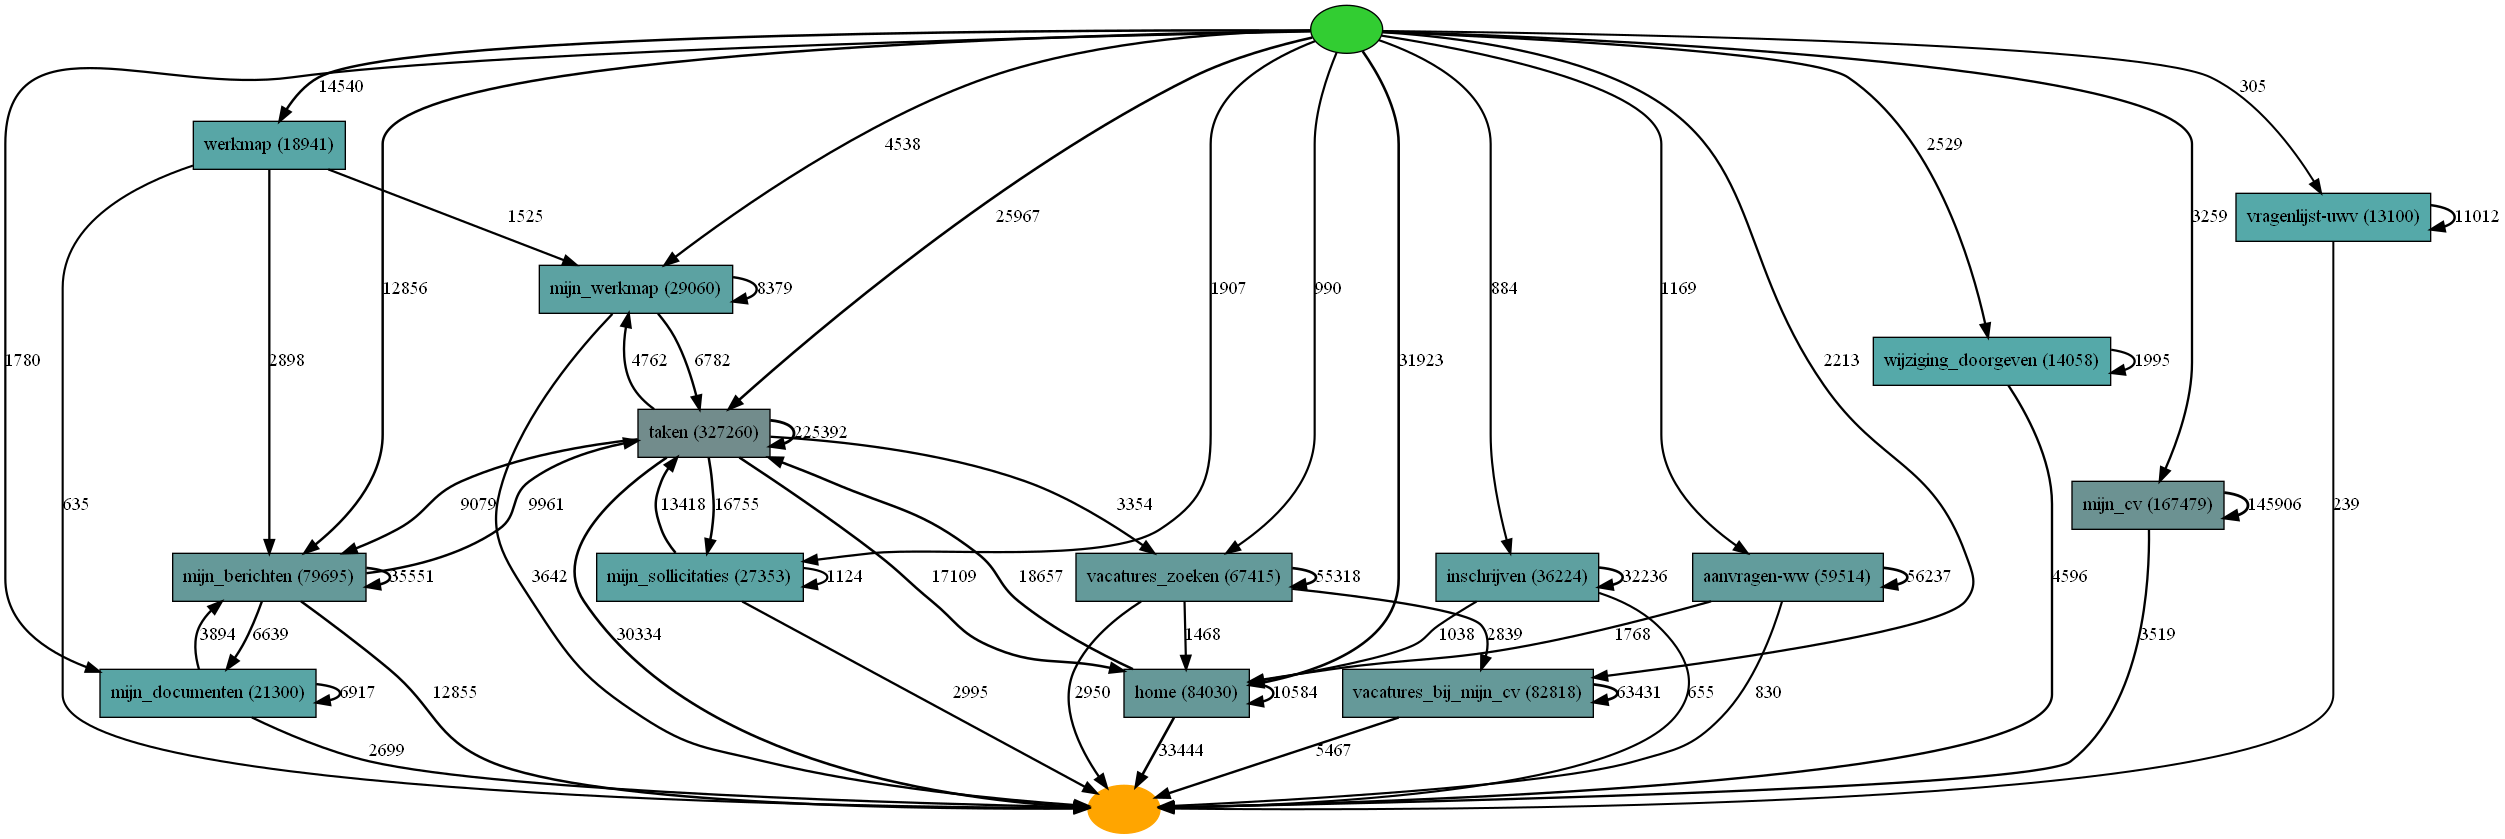

In [50]:
# Simplified Interface
heu_net = pm4py.discover_heuristics_net(
    log_segment_1, dependency_threshold=0.999, 
    and_threshold=0.999, 
    loop_two_threshold=0.999
)
pm4py.save_vis_heuristics_net(heu_net, file_path='Segment1_behavior_heuristicsminer.png') 
pm4py.view_heuristics_net(heu_net)



<center>
    <img src="https://user-images.githubusercontent.com/35700552/152362206-12231927-2a22-46e7-917b-3b969d1905ac.png"    />
</center>



## Segment 2: Age 30-39

In [192]:
# saving the most frequent activites of segment 2 into a list
most_frequent_activites_list_segment2 = activity_counts_logged_in_30_39[activity_counts_logged_in_30_39['Relative Frequency(%)'] >= 1]['Activity'].tolist()
most_frequent_activites_list_segment2

['taken',
 'mijn_cv',
 'vacatures_bij_mijn_cv',
 'home',
 'vacatures_zoeken',
 'mijn_berichten',
 'aanvragen-ww',
 'mijn_werkmap',
 'mijn_sollicitaties',
 'inschrijven',
 'mijn_documenten',
 'werkmap',
 'vragenlijst-uwv',
 'vacatures']

In [193]:
clicks_logged_in_SelectedColumns_Age30_39.head()

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
2,1503890,14805466,30-39,V,2015-09-01 19:35:06.707,aanvragen-tw
6,2140620,4752535,30-39,V,2015-11-02 11:39:37.567,inschrijven
20,912732,40492599,30-39,M,2015-12-21 09:33:11.770,inschrijven
26,1374280,11969296,30-39,V,2015-11-01 22:21:34.910,inschrijven
45,2060461,40872837,30-39,M,2016-01-07 15:18:52.213,vacatures_bij_mijn_cv


In [194]:
# copying required columns into new data frames and renaming the columns
segment_2 = clicks_logged_in_SelectedColumns_Age30_39[['SessionID', 'PAGE_NAME', 'TIMESTAMP']].copy()
segment_2=segment_2.rename(columns={'PAGE_NAME': 'activity','SessionID': 'case_id','TIMESTAMP': 'timestamp' })
segment_2.head()

,case_id,activity,timestamp
2,14805466,aanvragen-tw,2015-09-01 19:35:06.707
6,4752535,inschrijven,2015-11-02 11:39:37.567
20,40492599,inschrijven,2015-12-21 09:33:11.770
26,11969296,inschrijven,2015-11-01 22:21:34.910
45,40872837,vacatures_bij_mijn_cv,2016-01-07 15:18:52.213


In [195]:
segment_2.shape

(1432107, 3)

In [196]:
segment_2_most_frequent = segment_2.copy()

# removing records for non-frequent activities:
segment_2_most_frequent = segment_2_most_frequent[segment_2_most_frequent['activity'].isin(most_frequent_activites_list_segment2)]

## renaming  acivity name to "other" for all records with non-frequent activities:
# segment_2_most_frequent.loc[~segment_2_most_frequent['activity'].isin(most_frequent_activites_list_segment2), 'activity'] = 'other'

segment_2_most_frequent.head()

,case_id,activity,timestamp
6,4752535,inschrijven,2015-11-02 11:39:37.567
20,40492599,inschrijven,2015-12-21 09:33:11.770
26,11969296,inschrijven,2015-11-01 22:21:34.910
45,40872837,vacatures_bij_mijn_cv,2016-01-07 15:18:52.213
92,39889630,vacatures_bij_mijn_cv,2015-12-29 14:49:29.737


In [197]:
segment_2_most_frequent.shape

(1331474, 3)

In [198]:
# creating Event Log
event_log_segment_2 = pm4py.format_dataframe(
    segment_2_most_frequent,
    case_id = 'case_id',
    activity_key = 'activity',
    timestamp_key = 'timestamp', 
    timest_format = '%Y-%m-%d %H:%M:%S%z'
)

In [199]:
event_log_segment_2.head(7)

,case:concept:name,concept:name,time:timestamp,@@index
3048298,10000674,mijn_berichten,2015-07-25 16:01:09.233,3048298
5702503,10000674,mijn_cv,2015-07-25 16:02:40.123,5702503
6060527,10000674,mijn_cv,2015-07-25 16:03:06.297,6060527
6277764,10000674,mijn_cv,2015-07-25 16:08:32.067,6277764
6276680,10000674,mijn_cv,2015-07-25 16:08:55.357,6276680
6278949,10000674,mijn_cv,2015-07-25 16:09:59.633,6278949
6180271,10000674,mijn_berichten,2015-07-25 16:10:27.067,6180271


In [200]:
start_activities_2 = pm4py.get_start_activities(event_log_segment_2)
end_activities_2 = pm4py.get_end_activities(event_log_segment_2)

In [201]:
print(f'Start activities: {start_activities_2}')
print(f'\nEnd activities  : {end_activities_2}')

Start activities: {'home': 40754, 'taken': 30432, 'werkmap': 21272, 'mijn_berichten': 15534, 'mijn_werkmap': 6206, 'mijn_cv': 4254, 'vacatures_bij_mijn_cv': 3782, 'mijn_sollicitaties': 2425, 'mijn_documenten': 2119, 'vacatures_zoeken': 1298, 'aanvragen-ww': 1114, 'inschrijven': 872, 'vacatures': 645, 'vragenlijst-uwv': 367}

End activities  : {'home': 51561, 'taken': 32747, 'mijn_berichten': 13815, 'vacatures_bij_mijn_cv': 8519, 'mijn_werkmap': 4689, 'vacatures_zoeken': 4464, 'mijn_cv': 4250, 'mijn_sollicitaties': 4062, 'mijn_documenten': 3263, 'werkmap': 1123, 'vacatures': 1013, 'aanvragen-ww': 647, 'inschrijven': 639, 'vragenlijst-uwv': 282}


In [202]:
xes_exporter.apply(event_log_segment_2, 'event_log_segment_2.xes')

exporting log, completed traces ::   0%|          | 0/131074 [00:00<?, ?it/s]

In [204]:
log_segment_2 = xes_importer.apply('event_log_segment_2.xes')

parsing log, completed traces ::   0%|          | 0/131074 [00:00<?, ?it/s]

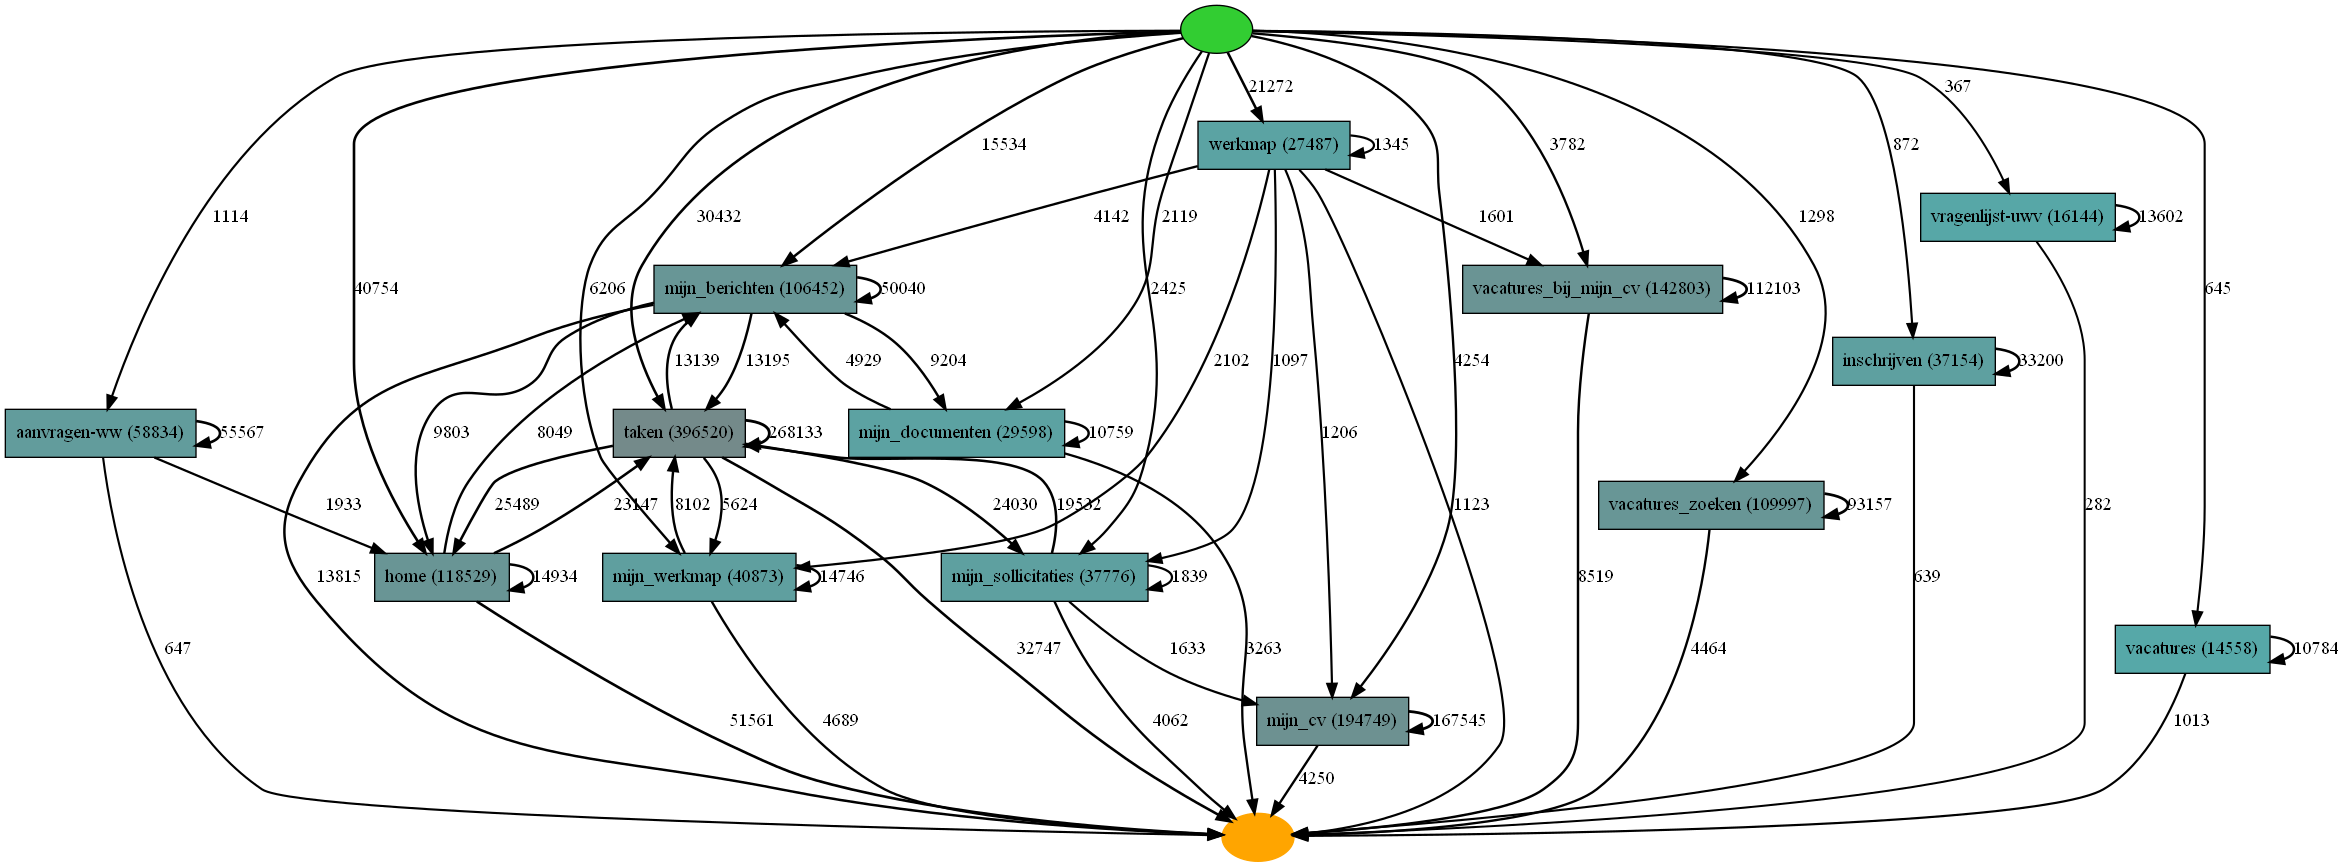

In [205]:
# Simplified Interface
heu_net = pm4py.discover_heuristics_net(
    log_segment_2, dependency_threshold=0.999, 
    and_threshold=0.999, 
    loop_two_threshold=0.999
)
pm4py.save_vis_heuristics_net(heu_net, file_path='Segment2_behavior_heuristicsminer.png') 
pm4py.view_heuristics_net(heu_net)



<center>
    <img src="https://user-images.githubusercontent.com/35700552/152362280-f9ddbd4f-8f8f-454c-a944-526d113f4e6a.png"    />
</center>



## Segment 3: Age 40-49

In [206]:
# saving the most frequent activites of segment 3 into a list
most_frequent_activites_list_segment3 = activity_counts_logged_in_40_49[activity_counts_logged_in_40_49['Relative Frequency(%)'] >= 1]['Activity'].tolist()
most_frequent_activites_list_segment3

['taken',
 'vacatures_bij_mijn_cv',
 'mijn_cv',
 'vacatures_zoeken',
 'home',
 'mijn_berichten',
 'aanvragen-ww',
 'mijn_werkmap',
 'mijn_sollicitaties',
 'werkmap',
 'mijn_documenten',
 'inschrijven',
 'vacatures',
 'vragenlijst-uwv']

In [207]:
# copying required columns into new data frames and renaming the columns
segment_3 = clicks_logged_in_SelectedColumns_Age40_49[['SessionID', 'PAGE_NAME', 'TIMESTAMP']].copy()
segment_3=segment_3.rename(columns={'PAGE_NAME': 'activity','SessionID': 'case_id','TIMESTAMP': 'timestamp' })
segment_3.head()

,case_id,activity,timestamp
5,32607429,frankrijk,2015-11-09 22:43:19.973
9,45886197,aanvragen-tw,2016-01-19 10:44:52.140
14,53703958,vacatures_bij_mijn_cv,2016-02-25 11:46:32.767
17,53703958,vacatures_bij_mijn_cv,2016-02-25 11:48:03.790
22,44484067,gegevens,2016-01-10 19:33:28.140


In [208]:
segment_3.shape

(1780253, 3)

In [209]:
segment_3_most_frequent = segment_3.copy()

# removing records for non-frequent activities:
segment_3_most_frequent = segment_3_most_frequent[segment_3_most_frequent['activity'].isin(most_frequent_activites_list_segment3)]

## renaming  acivity name to "other" for all records with non-frequent activities:
# segment_3_most_frequent.loc[~segment_3_most_frequent['activity'].isin(most_frequent_activites_list_segment3), 'activity'] = 'other'

segment_3_most_frequent.head()

,case_id,activity,timestamp
14,53703958,vacatures_bij_mijn_cv,2016-02-25 11:46:32.767
17,53703958,vacatures_bij_mijn_cv,2016-02-25 11:48:03.790
30,39078344,vacatures_bij_mijn_cv,2016-01-02 16:45:08.193
31,24431093,vacatures_bij_mijn_cv,2015-09-10 12:53:06.230
32,39351660,vacatures_bij_mijn_cv,2015-12-29 21:24:05.487


In [210]:
segment_3_most_frequent.shape

(1654532, 3)

In [211]:
# creating Event Log
event_log_segment_3 = pm4py.format_dataframe(
    segment_3_most_frequent,
    case_id = 'case_id',
    activity_key = 'activity',
    timestamp_key = 'timestamp', 
    timest_format = '%Y-%m-%d %H:%M:%S%z'
)

In [212]:
event_log_segment_3.head(7)

,case:concept:name,concept:name,time:timestamp,@@index
1529834,1000186,werkmap,2015-11-02 15:04:30.677,1529834
1111157,1000186,mijn_werkmap,2015-11-02 15:06:47.953,1111157
3055064,10002080,mijn_berichten,2015-10-29 15:26:26.363,3055064
5546343,10002080,mijn_berichten,2015-10-29 15:26:53.703,5546343
1557888,10002106,werkmap,2015-10-24 15:45:15.400,1557888
3264822,10002106,taken,2015-10-24 15:46:32.417,3264822
4835967,10002106,taken,2015-10-24 15:46:54.627,4835967


In [213]:
start_activities_3 = pm4py.get_start_activities(event_log_segment_3)
end_activities_3 = pm4py.get_end_activities(event_log_segment_3)

In [214]:
print(f'Start activities: {start_activities_3}')
print(f'\nEnd activities  : {end_activities_3}')

Start activities: {'home': 42778, 'werkmap': 33913, 'taken': 32902, 'mijn_berichten': 17088, 'mijn_werkmap': 8313, 'vacatures_bij_mijn_cv': 5744, 'mijn_cv': 5237, 'mijn_sollicitaties': 3225, 'mijn_documenten': 2248, 'vacatures_zoeken': 1710, 'aanvragen-ww': 1034, 'vacatures': 773, 'inschrijven': 752, 'vragenlijst-uwv': 428}

End activities  : {'home': 67244, 'taken': 32694, 'mijn_berichten': 13769, 'vacatures_bij_mijn_cv': 12600, 'mijn_werkmap': 5713, 'vacatures_zoeken': 5518, 'mijn_sollicitaties': 5222, 'mijn_cv': 4944, 'mijn_documenten': 3646, 'werkmap': 1768, 'vacatures': 1490, 'aanvragen-ww': 655, 'inschrijven': 593, 'vragenlijst-uwv': 289}


In [215]:
xes_exporter.apply(event_log_segment_3, 'event_log_segment_3.xes')

exporting log, completed traces ::   0%|          | 0/156145 [00:00<?, ?it/s]

In [216]:
log_segment_3 = xes_importer.apply('event_log_segment_3.xes')

parsing log, completed traces ::   0%|          | 0/156145 [00:00<?, ?it/s]

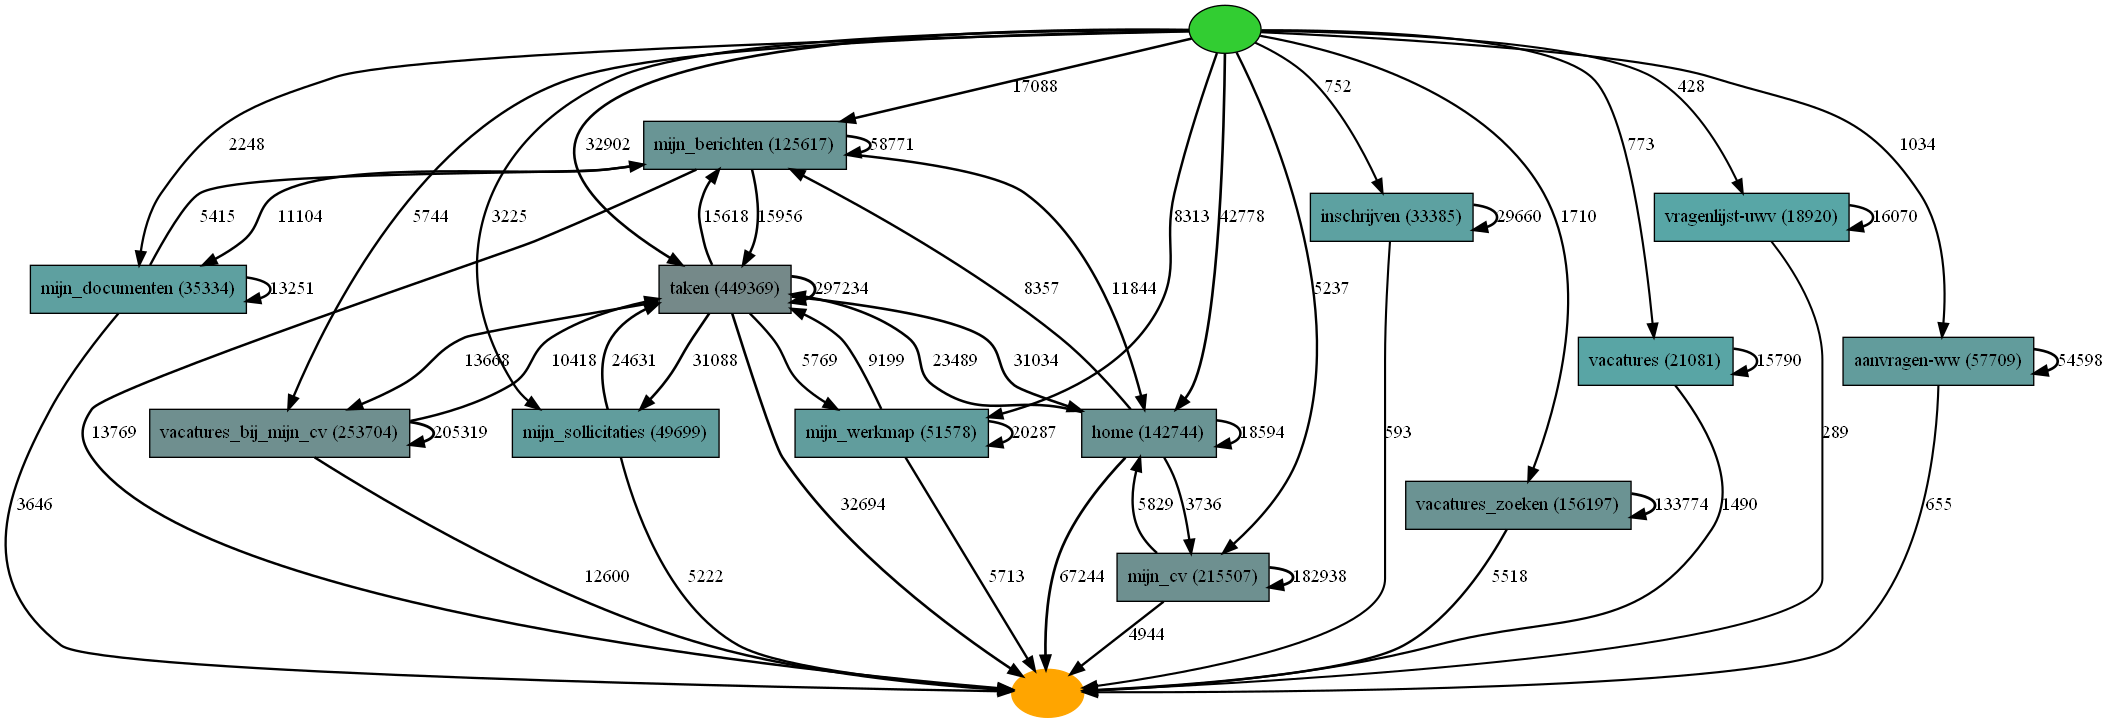

In [217]:
# Simplified Interface
heu_net = pm4py.discover_heuristics_net(
    log_segment_3, dependency_threshold=0.9999, 
    and_threshold=0.999, 
    loop_two_threshold=0.999
)
pm4py.save_vis_heuristics_net(heu_net, file_path='Segment3_behavior_heuristicsminer.png') 
pm4py.view_heuristics_net(heu_net)



<center>
    <img src="https://user-images.githubusercontent.com/35700552/152362349-c9309296-fe3f-4eb1-a109-aeca6f7a96a0.png"    />
</center>



## Segment 4: Age 50-65

In [218]:
# saving the most frequent activites of segment 4 into a list
most_frequent_activites_list_segment4 = activity_counts_logged_in_50_65[activity_counts_logged_in_50_65['Relative Frequency(%)'] >= 1]['Activity'].tolist()
most_frequent_activites_list_segment4

['taken',
 'vacatures_bij_mijn_cv',
 'mijn_cv',
 'vacatures_zoeken',
 'home',
 'mijn_berichten',
 'werkmap',
 'mijn_sollicitaties',
 'mijn_werkmap',
 'aanvragen-ww',
 'mijn_documenten',
 'inschrijven',
 'vacatures']

In [219]:
clicks_logged_in_SelectedColumns_Age50_65.head()

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
0,2025826,12956475,50-65,V,2015-10-05 10:12:56.880,50plus
1,2025826,13243433,50-65,V,2015-09-30 15:14:35.943,50plus
3,2063574,12710639,50-65,M,2015-11-06 10:47:42.137,50plus
7,2099262,388094,50-65,V,2015-10-28 17:00:52.393,inschrijven
8,1626445,12239424,50-65,M,2015-08-27 21:03:34.143,inschrijven


In [220]:
# copying required columns into new data frames and renaming the columns
segment_4 = clicks_logged_in_SelectedColumns_Age50_65[['SessionID', 'PAGE_NAME', 'TIMESTAMP']].copy()
segment_4=segment_4.rename(columns={'PAGE_NAME': 'activity','SessionID': 'case_id','TIMESTAMP': 'timestamp' })
segment_4.head()

,case_id,activity,timestamp
0,12956475,50plus,2015-10-05 10:12:56.880
1,13243433,50plus,2015-09-30 15:14:35.943
3,12710639,50plus,2015-11-06 10:47:42.137
7,388094,inschrijven,2015-10-28 17:00:52.393
8,12239424,inschrijven,2015-08-27 21:03:34.143


In [221]:
segment_4.shape

(2856529, 3)

In [222]:
segment_4_most_frequent = segment_4.copy()

# removing records for non-frequent activities:
segment_4_most_frequent = segment_4_most_frequent[segment_4_most_frequent['activity'].isin(most_frequent_activites_list_segment4)]

## renaming  acivity name to "other" for all records with non-frequent activities:
# segment_4_most_frequent.loc[~segment_4_most_frequent['activity'].isin(most_frequent_activites_list_segment4), 'activity'] = 'other'

segment_4_most_frequent.head()

,case_id,activity,timestamp
7,388094,inschrijven,2015-10-28 17:00:52.393
8,12239424,inschrijven,2015-08-27 21:03:34.143
10,52132756,vacatures_bij_mijn_cv,2016-02-18 18:41:14.117
11,28434762,vacatures_bij_mijn_cv,2015-10-28 10:14:42.613
12,8162220,vacatures_bij_mijn_cv,2015-07-14 13:50:37.500


In [223]:
segment_4_most_frequent.shape

(2605649, 3)

In [224]:
# creating Event Log
event_log_segment_4 = pm4py.format_dataframe(
    segment_4_most_frequent,
    case_id = 'case_id',
    activity_key = 'activity',
    timestamp_key = 'timestamp', 
    timest_format = '%Y-%m-%d %H:%M:%S%z'
)

In [225]:
event_log_segment_4.head(7)

,case:concept:name,concept:name,time:timestamp,@@index
3356990,10000031,mijn_werkmap,2015-07-02 12:56:14.223,3356990
2814668,10000323,taken,2015-07-21 20:19:34.013,2814668
4325516,10000323,taken,2015-07-21 20:20:00.377,4325516
4541020,10000323,taken,2015-07-21 20:21:28.657,4541020
4540536,10000323,taken,2015-07-21 20:21:59.830,4540536
4540539,10000323,taken,2015-07-21 20:22:56.190,4540539
2382932,10000597,home,2015-08-18 11:53:29.253,2382932


In [226]:
start_activities_4 = pm4py.get_start_activities(event_log_segment_4)
end_activities_4 = pm4py.get_end_activities(event_log_segment_4)

In [227]:
print(f'Start activities: {start_activities_4}')
print(f'\nEnd activities  : {end_activities_4}')

Start activities: {'werkmap': 71546, 'home': 62150, 'taken': 48452, 'mijn_berichten': 26729, 'mijn_werkmap': 14355, 'vacatures_bij_mijn_cv': 11405, 'mijn_cv': 8073, 'mijn_sollicitaties': 5441, 'mijn_documenten': 3540, 'vacatures_zoeken': 2627, 'inschrijven': 1300, 'aanvragen-ww': 1238, 'vacatures': 1220}

End activities  : {'home': 120113, 'taken': 47218, 'vacatures_bij_mijn_cv': 22808, 'mijn_berichten': 20495, 'vacatures_zoeken': 8884, 'mijn_werkmap': 8860, 'mijn_sollicitaties': 8131, 'mijn_cv': 7786, 'mijn_documenten': 6397, 'werkmap': 3438, 'vacatures': 2343, 'inschrijven': 818, 'aanvragen-ww': 785}


In [228]:
xes_exporter.apply(event_log_segment_4, 'event_log_segment_4.xes')

exporting log, completed traces ::   0%|          | 0/258076 [00:00<?, ?it/s]

In [229]:
log_segment_4 = xes_importer.apply('event_log_segment_4.xes')

parsing log, completed traces ::   0%|          | 0/258076 [00:00<?, ?it/s]

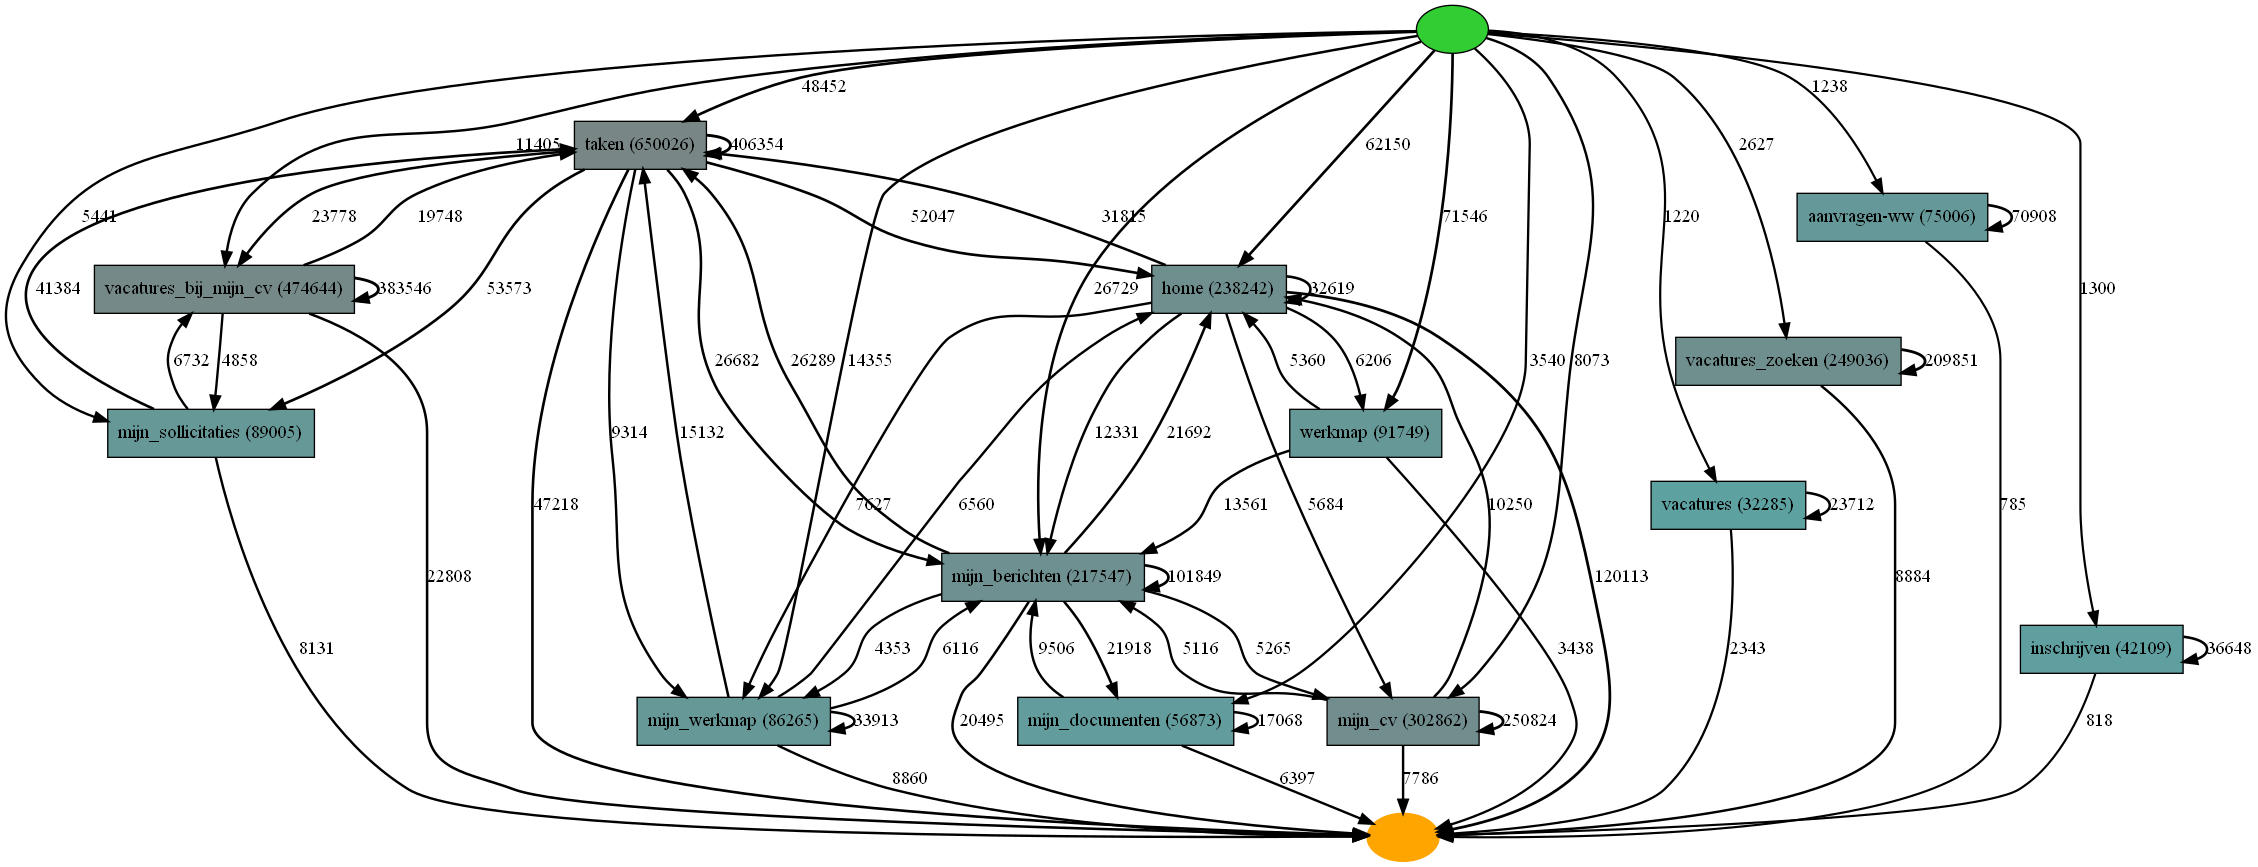

In [230]:
# Simplified Interface
heu_net = pm4py.discover_heuristics_net(
    log_segment_4, dependency_threshold=0.9999, 
    and_threshold=0.999, 
    loop_two_threshold=0.999
)
pm4py.save_vis_heuristics_net(heu_net, file_path='Segment4_behavior_heuristicsminer.png') 
pm4py.view_heuristics_net(heu_net)






<center>
    <img src="https://user-images.githubusercontent.com/35700552/152362429-fdde913c-fd67-4d30-91d5-c0e7d61c21fa.png"    />
</center>



## Segment 5: Female

In [231]:
# saving the most frequent activites of segment 5 into a list
most_frequent_activites_list_segment5 = activity_counts_logged_in_Female[activity_counts_logged_in_Female['Relative Frequency(%)'] >= 1]['Activity'].tolist()
most_frequent_activites_list_segment5

['taken',
 'mijn_cv',
 'vacatures_bij_mijn_cv',
 'vacatures_zoeken',
 'home',
 'mijn_berichten',
 'aanvragen-ww',
 'mijn_sollicitaties',
 'mijn_werkmap',
 'werkmap',
 'mijn_documenten',
 'inschrijven',
 'vacatures',
 'vragenlijst-uwv']

In [232]:
clicks_logged_in_SelectedColumns_Female.head()

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
0,2025826,12956475,50-65,V,2015-10-05 10:12:56.880,50plus
1,2025826,13243433,50-65,V,2015-09-30 15:14:35.943,50plus
2,1503890,14805466,30-39,V,2015-09-01 19:35:06.707,aanvragen-tw
4,2185161,44281847,18-29,V,2016-01-11 18:44:07.877,bijstandsuitkering
6,2140620,4752535,30-39,V,2015-11-02 11:39:37.567,inschrijven


In [233]:
# copying required columns into new data frames and renaming the columns
segment_5 = clicks_logged_in_SelectedColumns_Female[['SessionID', 'PAGE_NAME', 'TIMESTAMP']].copy()
segment_5=segment_5.rename(columns={'PAGE_NAME': 'activity','SessionID': 'case_id','TIMESTAMP': 'timestamp' })
segment_5.head()

,case_id,activity,timestamp
0,12956475,50plus,2015-10-05 10:12:56.880
1,13243433,50plus,2015-09-30 15:14:35.943
2,14805466,aanvragen-tw,2015-09-01 19:35:06.707
4,44281847,bijstandsuitkering,2016-01-11 18:44:07.877
6,4752535,inschrijven,2015-11-02 11:39:37.567


In [234]:
segment_5.shape

(3704045, 3)

In [235]:
segment_5_most_frequent = segment_5.copy()

# removing records for non-frequent activities:
segment_5_most_frequent = segment_5_most_frequent[segment_5_most_frequent['activity'].isin(most_frequent_activites_list_segment5)]

## renaming  acivity name to "other" for all records with non-frequent activities:
# segment_5_most_frequent.loc[~segment_5_most_frequent['activity'].isin(most_frequent_activites_list_segment5), 'activity'] = 'other'

segment_5_most_frequent.head()

,case_id,activity,timestamp
6,4752535,inschrijven,2015-11-02 11:39:37.567
7,388094,inschrijven,2015-10-28 17:00:52.393
14,53703958,vacatures_bij_mijn_cv,2016-02-25 11:46:32.767
17,53703958,vacatures_bij_mijn_cv,2016-02-25 11:48:03.790
25,388094,inschrijven,2015-10-28 17:03:29.070


In [236]:
segment_5_most_frequent.shape

(3421504, 3)

In [237]:
# creating Event Log
event_log_segment_5 = pm4py.format_dataframe(
    segment_5_most_frequent,
    case_id = 'case_id',
    activity_key = 'activity',
    timestamp_key = 'timestamp', 
    timest_format = '%Y-%m-%d %H:%M:%S%z'
)

In [238]:
event_log_segment_5.head(7)

,case:concept:name,concept:name,time:timestamp,@@index
3356990,10000031,mijn_werkmap,2015-07-02 12:56:14.223,3356990
2814668,10000323,taken,2015-07-21 20:19:34.013,2814668
4325516,10000323,taken,2015-07-21 20:20:00.377,4325516
4541020,10000323,taken,2015-07-21 20:21:28.657,4541020
4540536,10000323,taken,2015-07-21 20:21:59.830,4540536
4540539,10000323,taken,2015-07-21 20:22:56.190,4540539
3048298,10000674,mijn_berichten,2015-07-25 16:01:09.233,3048298


In [239]:
start_activities_5 = pm4py.get_start_activities(event_log_segment_5)
end_activities_5 = pm4py.get_end_activities(event_log_segment_5)

In [240]:
print(f'Start activities: {start_activities_5}')
print(f'\nEnd activities  : {end_activities_5}')

Start activities: {'home': 92297, 'werkmap': 74997, 'taken': 70717, 'mijn_berichten': 37469, 'mijn_werkmap': 16055, 'vacatures_bij_mijn_cv': 10376, 'mijn_cv': 10373, 'mijn_sollicitaties': 6733, 'mijn_documenten': 5362, 'vacatures_zoeken': 3705, 'aanvragen-ww': 2267, 'inschrijven': 1817, 'vacatures': 1560, 'vragenlijst-uwv': 839}

End activities  : {'home': 139199, 'taken': 75663, 'mijn_berichten': 31927, 'vacatures_bij_mijn_cv': 23849, 'vacatures_zoeken': 13086, 'mijn_sollicitaties': 11321, 'mijn_werkmap': 10934, 'mijn_cv': 10098, 'mijn_documenten': 8524, 'werkmap': 3520, 'vacatures': 3170, 'aanvragen-ww': 1413, 'inschrijven': 1295, 'vragenlijst-uwv': 568}


In [241]:
xes_exporter.apply(event_log_segment_5, 'event_log_segment_5.xes')

exporting log, completed traces ::   0%|          | 0/334567 [00:00<?, ?it/s]

In [242]:
log_segment_5 = xes_importer.apply('event_log_segment_5.xes')

parsing log, completed traces ::   0%|          | 0/334567 [00:00<?, ?it/s]

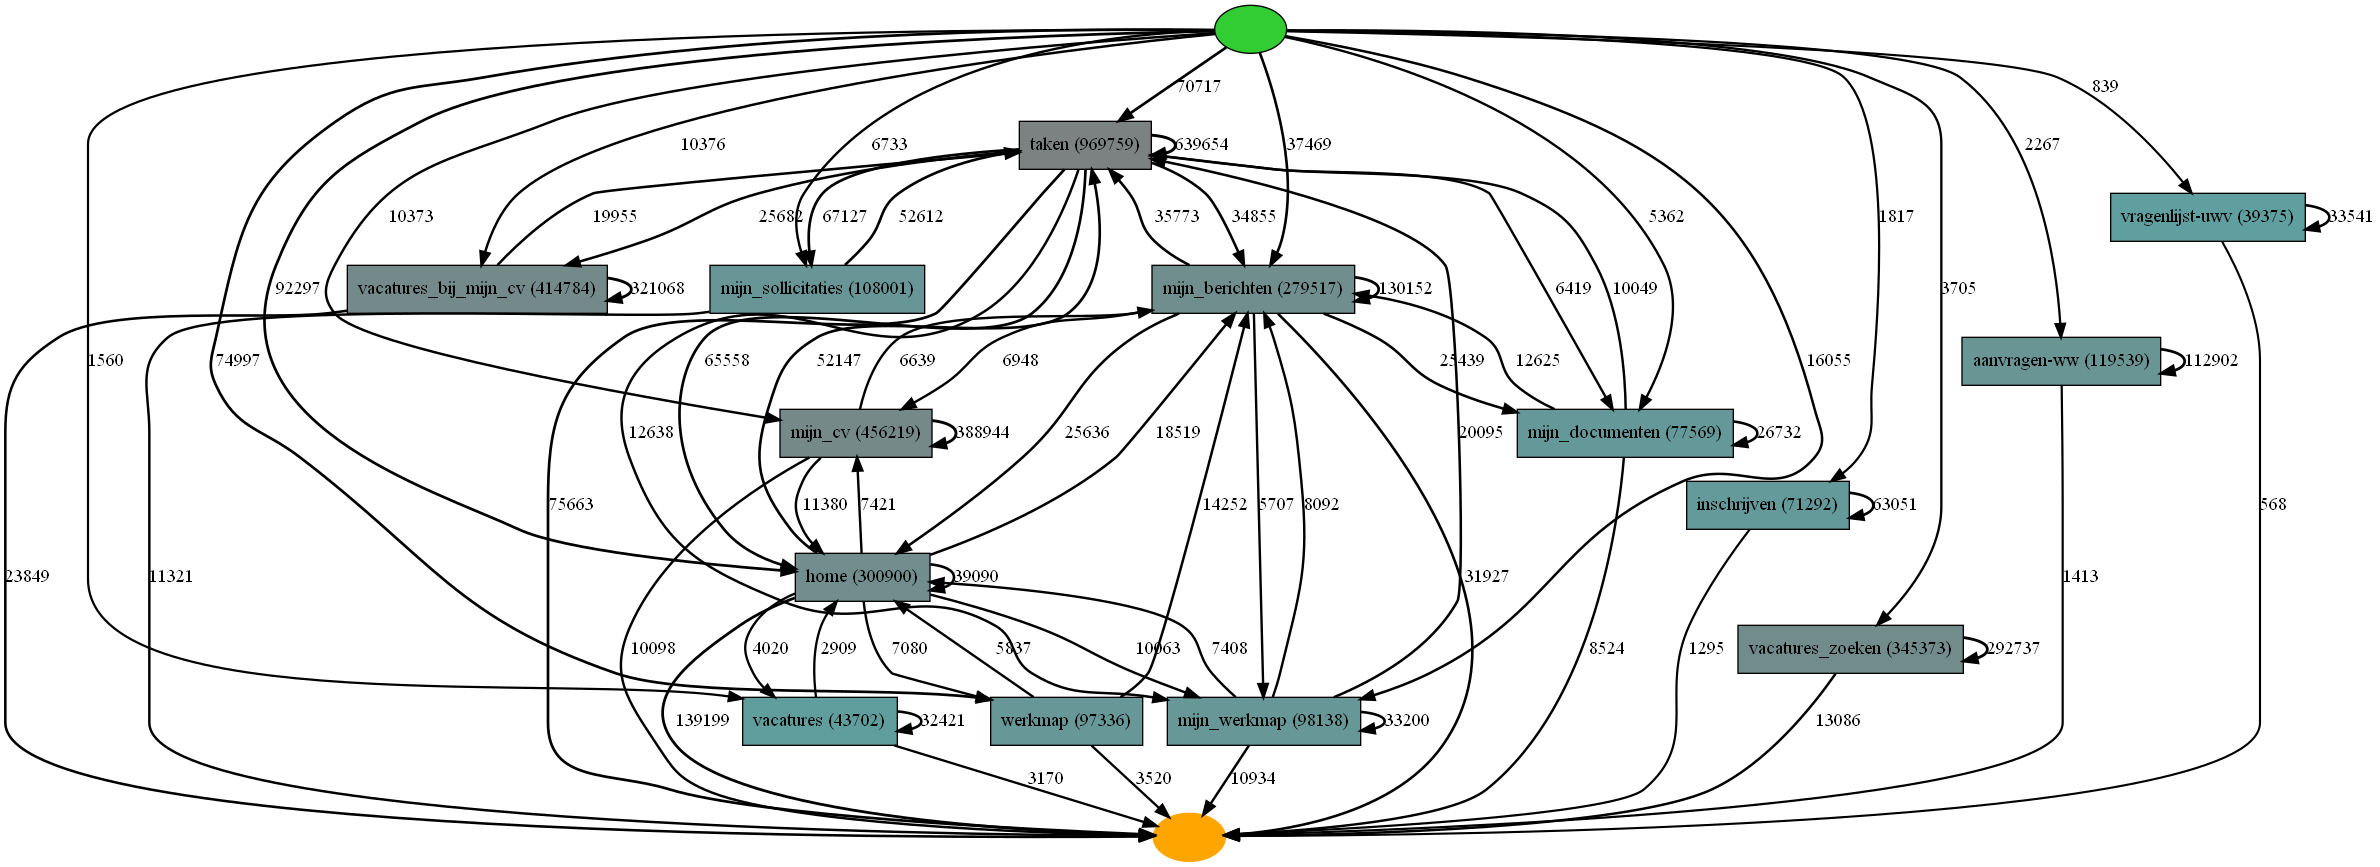

In [243]:
# Simplified Interface
heu_net = pm4py.discover_heuristics_net(
    log_segment_5, dependency_threshold=0.9999, 
    and_threshold=0.999, 
    loop_two_threshold=0.999
)
pm4py.save_vis_heuristics_net(heu_net, file_path='Segment5_behavior_heuristicsminer.png') 
pm4py.view_heuristics_net(heu_net)

## Segment 6: Male

In [244]:
# saving the most frequent activites of segment 3 into a list
most_frequent_activites_list_segment6 = activity_counts_logged_in_Male[activity_counts_logged_in_Male['Relative Frequency(%)'] >= 1]['Activity'].tolist()
most_frequent_activites_list_segment6

['taken',
 'vacatures_bij_mijn_cv',
 'mijn_cv',
 'home',
 'mijn_berichten',
 'vacatures_zoeken',
 'aanvragen-ww',
 'mijn_werkmap',
 'mijn_sollicitaties',
 'werkmap',
 'inschrijven',
 'mijn_documenten']

In [245]:
clicks_logged_in_SelectedColumns_Male.head()

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
3,2063574,12710639,50-65,M,2015-11-06 10:47:42.137,50plus
5,2074173,32607429,40-49,M,2015-11-09 22:43:19.973,frankrijk
8,1626445,12239424,50-65,M,2015-08-27 21:03:34.143,inschrijven
9,2096614,45886197,40-49,M,2016-01-19 10:44:52.140,aanvragen-tw
10,1288513,52132756,50-65,M,2016-02-18 18:41:14.117,vacatures_bij_mijn_cv


In [246]:
# copying required columns into new data frames and renaming the columns
segment_6 = clicks_logged_in_SelectedColumns_Male[['SessionID', 'PAGE_NAME', 'TIMESTAMP']].copy()
segment_6=segment_6.rename(columns={'PAGE_NAME': 'activity','SessionID': 'case_id','TIMESTAMP': 'timestamp' })
segment_6.head()

,case_id,activity,timestamp
3,12710639,50plus,2015-11-06 10:47:42.137
5,32607429,frankrijk,2015-11-09 22:43:19.973
8,12239424,inschrijven,2015-08-27 21:03:34.143
9,45886197,aanvragen-tw,2016-01-19 10:44:52.140
10,52132756,vacatures_bij_mijn_cv,2016-02-18 18:41:14.117


In [247]:
segment_6.shape

(3470889, 3)

In [248]:
segment_6_most_frequent = segment_6.copy()

# removing records for non-frequent activities:
segment_6_most_frequent = segment_6_most_frequent[segment_6_most_frequent['activity'].isin(most_frequent_activites_list_segment6)]

## renaming  acivity name to "other" for all records with non-frequent activities:
# segment_6_most_frequent.loc[~segment_6_most_frequent['activity'].isin(most_frequent_activites_list_segment6), 'activity'] = 'other'

segment_6_most_frequent.head()

,case_id,activity,timestamp
8,12239424,inschrijven,2015-08-27 21:03:34.143
10,52132756,vacatures_bij_mijn_cv,2016-02-18 18:41:14.117
11,28434762,vacatures_bij_mijn_cv,2015-10-28 10:14:42.613
12,8162220,vacatures_bij_mijn_cv,2015-07-14 13:50:37.500
13,41588258,vacatures_bij_mijn_cv,2015-12-17 11:32:58.083


In [249]:
segment_6_most_frequent.shape

(3151329, 3)

In [250]:
# creating Event Log
event_log_segment_6 = pm4py.format_dataframe(
    segment_6_most_frequent,
    case_id = 'case_id',
    activity_key = 'activity',
    timestamp_key = 'timestamp', 
    timest_format = '%Y-%m-%d %H:%M:%S%z'
)

In [251]:
event_log_segment_6.head(7)

,case:concept:name,concept:name,time:timestamp,@@index
2382932,10000597,home,2015-08-18 11:53:29.253,2382932
2891012,10000597,taken,2015-08-18 11:54:07.543,2891012
4226394,10000597,taken,2015-08-18 11:54:19.640,4226394
4494539,10000597,taken,2015-08-18 11:55:15.473,4494539
1229277,10000714,home,2015-11-04 11:30:12.763,1229277
3421475,10000714,taken,2015-11-04 11:31:15.663,3421475
4205760,10000714,taken,2015-11-04 11:31:27.270,4205760


In [252]:
start_activities_6 = pm4py.get_start_activities(event_log_segment_6)
end_activities_6 = pm4py.get_end_activities(event_log_segment_6)

In [253]:
print(f'Start activities: {start_activities_6}')
print(f'\nEnd activities  : {end_activities_6}')

Start activities: {'home': 85734, 'taken': 67595, 'werkmap': 66489, 'mijn_berichten': 34958, 'mijn_werkmap': 17611, 'vacatures_bij_mijn_cv': 12897, 'mijn_cv': 10518, 'mijn_sollicitaties': 6339, 'mijn_documenten': 4376, 'vacatures_zoeken': 3003, 'aanvragen-ww': 2307, 'inschrijven': 2001}

End activities  : {'home': 134393, 'taken': 68835, 'mijn_berichten': 29443, 'vacatures_bij_mijn_cv': 25645, 'mijn_werkmap': 12323, 'mijn_cv': 10518, 'mijn_sollicitaties': 9550, 'vacatures_zoeken': 8782, 'mijn_documenten': 7610, 'werkmap': 3767, 'aanvragen-ww': 1535, 'inschrijven': 1427}


In [254]:
xes_exporter.apply(event_log_segment_6, 'event_log_segment_6.xes')

exporting log, completed traces ::   0%|          | 0/313828 [00:00<?, ?it/s]

In [255]:
log_segment_6 = xes_importer.apply('event_log_segment_6.xes')

parsing log, completed traces ::   0%|          | 0/313828 [00:00<?, ?it/s]

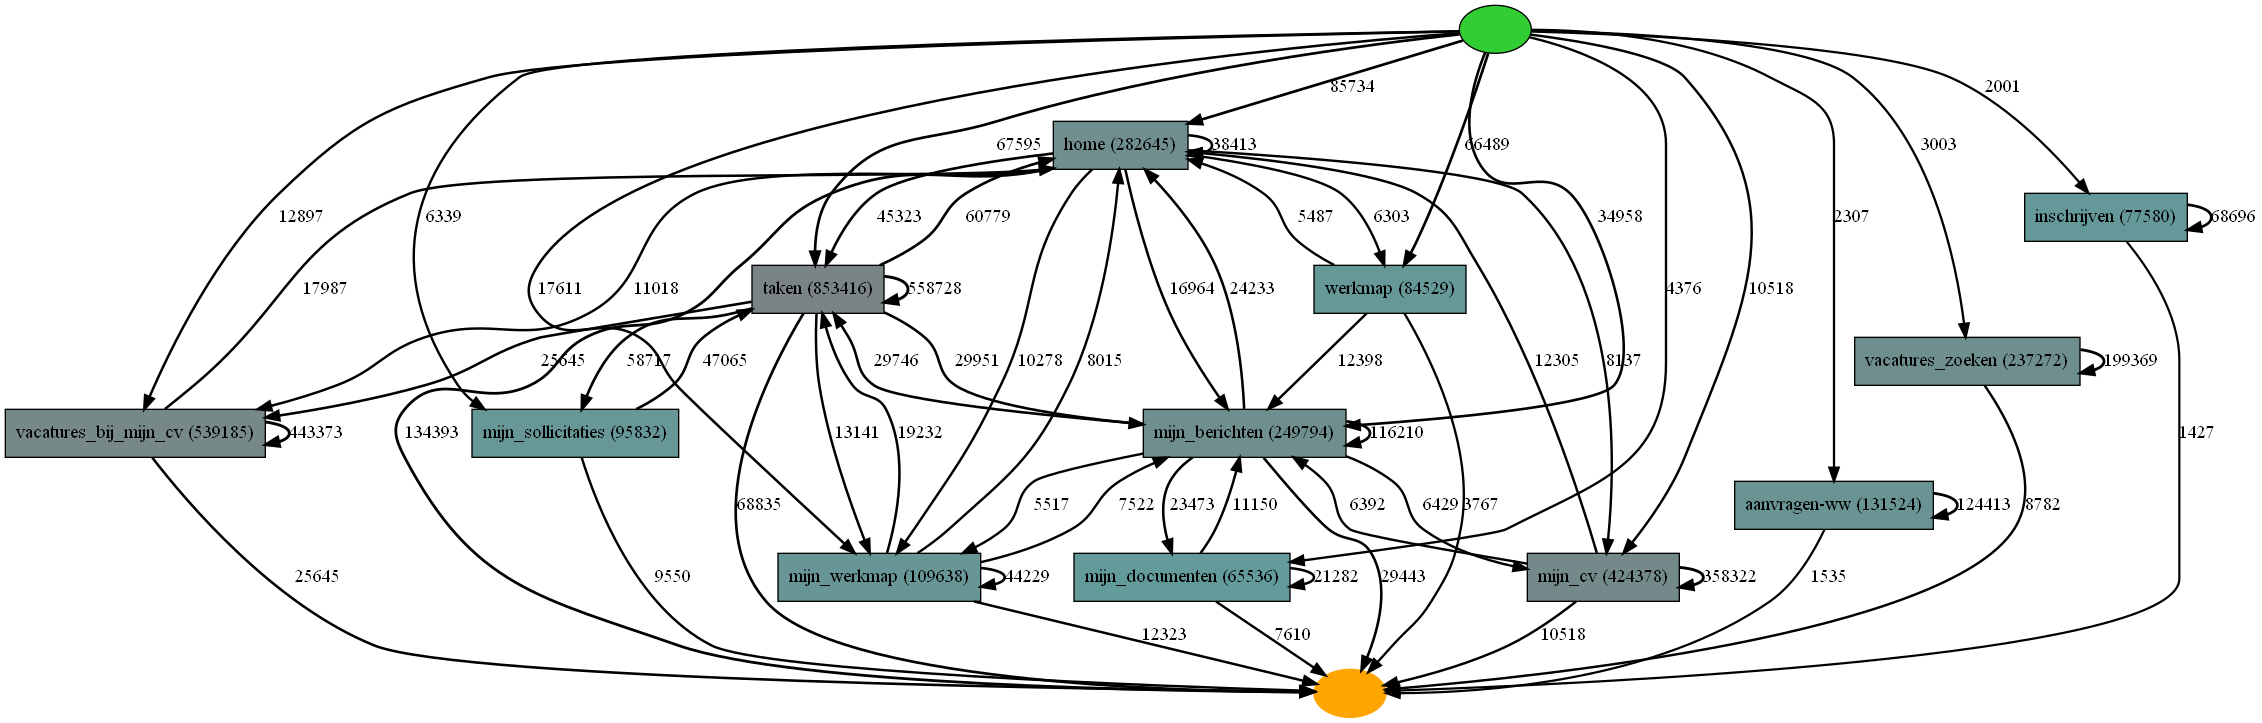

In [258]:
# Simplified Interface
heu_net = pm4py.discover_heuristics_net(
    log_segment_6, dependency_threshold=0.9999, 
    and_threshold=0.999, 
    loop_two_threshold=0.999
)
pm4py.save_vis_heuristics_net(heu_net, file_path='Segment6_behavior_heuristicsminer.png') 
pm4py.view_heuristics_net(heu_net)

<div id="Customer_behaviour">
    <h2>Challenge2: Customer Behaviour: Changes of Usage Patterns Over Time</h2>

</div>

In the next cell we import the "clicks_logged_in_SelectedColumns" dataset. we exported it as a csv file in the begining of this notebook:

In [51]:
clicks_logged_in_SelectedColumns = pd.read_csv('clicks_logged_in_SelectedColumns.csv')
clicks_logged_in_SelectedColumns.head()

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
0,2025826,12956475,50-65,V,2015-10-05 10:12:56.880,50plus
1,2025826,13243433,50-65,V,2015-09-30 15:14:35.943,50plus
2,1503890,14805466,30-39,V,2015-09-01 19:35:06.707,aanvragen-tw
3,2063574,12710639,50-65,M,2015-11-06 10:47:42.137,50plus
4,2185161,44281847,18-29,V,2016-01-11 18:44:07.877,bijstandsuitkering


In [52]:
#sorting values based on CustomerID and SessionID
clicks_logged_in_SelectedColumns.sort_values(['CustomerID', 'SessionID'], ascending=[True, True])

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
522312,220,37784474,40-49,V,2015-12-07 10:12:33.923,mijn_berichten
525993,220,37784474,40-49,V,2015-12-07 10:12:51.353,mijn_cv
526001,220,37784474,40-49,V,2015-12-07 10:14:11.293,mijn_cv
526947,220,37784474,40-49,V,2015-12-07 10:14:49.287,mijn_cv
526953,220,37784474,40-49,V,2015-12-07 10:14:54.077,mijn_cv
...,...,...,...,...,...,...
4328687,2240448,54997653,18-29,V,2016-02-28 13:27:33.703,taken
4698173,2240448,54997653,18-29,V,2016-02-28 13:27:59.707,taken
4698544,2240448,54997653,18-29,V,2016-02-28 13:28:21.290,taken
4699334,2240448,54997653,18-29,V,2016-02-28 13:27:53.247,taken


In the next cell we are going to count number of sessions of each customer:

In [53]:
# grouping the data by CustomerID and counting unique SessionIDs for each CustomerID 
number_of_sessions_per_customer = pd.DataFrame(clicks_logged_in_SelectedColumns.groupby('CustomerID')['SessionID'].nunique())

# reseting the datafraem index and renaming columns
number_of_sessions_per_customer.reset_index(level=0, inplace=True)
number_of_sessions_per_customer = number_of_sessions_per_customer.rename(columns={'index': 'CustomerID','SessionID': '# of Sessions' })

number_of_sessions_per_customer.head(10)

,CustomerID,# of Sessions
0,220,19
1,318,11
2,495,15
3,511,29
4,609,31
5,1055,3
6,1339,14
7,1362,34
8,1445,16
9,1453,40


In [54]:
# display the above dataframe sorted by number of sessions
number_of_sessions_per_customer.sort_values(['# of Sessions'], ascending=True)

,CustomerID,# of Sessions
842,90834,1
11169,1692568,1
11166,1691597,1
24646,2200449,1
11154,1689670,1
...,...,...
15111,2033620,364
15303,2036141,423
6236,984160,433
9128,1389451,450


In the next cell we loop through the above dataset and calculate number of customers who have at least 1,2,3,...,15 seessions

In [55]:
# creating an empty list
number_of_customer_min_sessions = list()

# looping through "number_of_sessions_per_customer" dataset and count number of customers who have at least 1,2,..,15 sessions
for one in range(1,16):
    number_of_customer_min_sessions.append(
        number_of_sessions_per_customer[number_of_sessions_per_customer['# of Sessions'] >= one]['CustomerID'].count())
    
number_of_customer_min_sessions

[26647,
 25705,
 24733,
 23815,
 22901,
 21959,
 21059,
 20151,
 19298,
 18462,
 17699,
 16970,
 16209,
 15444,
 14800]

In [56]:
# creating list of Session number names for our table

session_list = ['1 Session']

for one in range(2,16):
    session_list.append(str(one) +' ' + "Sessions")
    
session_list

['1 Session',
 '2 Sessions',
 '3 Sessions',
 '4 Sessions',
 '5 Sessions',
 '6 Sessions',
 '7 Sessions',
 '8 Sessions',
 '9 Sessions',
 '10 Sessions',
 '11 Sessions',
 '12 Sessions',
 '13 Sessions',
 '14 Sessions',
 '15 Sessions']

In the next cell we will calculate the change in number of customers over the sessions

In [57]:
change_list = ['-']

for one in range(1,15):
    change_list.append(round((number_of_customer_min_sessions[one]-number_of_customer_min_sessions[one-1])/number_of_customer_min_sessions[one-1]*100,2))
    
change_list

['-',
 -3.54,
 -3.78,
 -3.71,
 -3.84,
 -4.11,
 -4.1,
 -4.31,
 -4.23,
 -4.33,
 -4.13,
 -4.12,
 -4.48,
 -4.72,
 -4.17]

Now we can create our table!

In [58]:
# creating a dictionary which has columns names as keys and the three lists we created above as values
least_one_session = pd.DataFrame(
    {'Session': session_list,
     'Customers': number_of_customer_min_sessions,
     'Change': change_list
    })

# converting the dictionary to a dataframe
least_one_session = pd.DataFrame(data=least_one_session)
least_one_session


,Session,Customers,Change
0,1 Session,26647,-
1,2 Sessions,25705,-3.54
2,3 Sessions,24733,-3.78
3,4 Sessions,23815,-3.71
4,5 Sessions,22901,-3.84
5,6 Sessions,21959,-4.11
6,7 Sessions,21059,-4.1
7,8 Sessions,20151,-4.31
8,9 Sessions,19298,-4.23
9,10 Sessions,18462,-4.33


The above tables  introduces the number of customer having at least 15 sessions of using the website. The analysis of results suggests that 26,647 users had at least one session which significantly decreased to 14,800 who had at least 15 sessions. From this statistics, we can infer that the users don’t tend to use the website after they used it for the first time and this trends continues over time. E.g. Table 5 suggests that 3.54 % of the customers did not use the website again after they used it for the first time. The average drop rate between sessions is  about 4 %.

The following is the same table from our base article; as you can see, the numbers are very similar, and the pattern is the same. There is only a slight difference between numbers because, as we mentioned before, the authors deleted some records in their preprocessing, which we don't know why.

<center>
    <img src="https://user-images.githubusercontent.com/35700552/151620169-0769f4ce-4889-4e3b-8331-dc0c5e218cc7.png"  />
</center>    




**Now we want to aggregate the number of logs per session sorted according to the time.**

In the next cell we sort the "clicks_logged_in_SelectedColumns" dataset by date and time:

In [59]:
clicks_logged_in_SelectedColumns_SortedbyTime = clicks_logged_in_SelectedColumns.sort_values('TIMESTAMP', ascending=True)

In [60]:
clicks_logged_in_SelectedColumns_SortedbyTime

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
3271608,797444,10125891,50-65,M,2015-07-01 02:36:59.713,mijn_berichten
5687809,797444,10125891,50-65,M,2015-07-01 02:37:13.210,mijn_cv
6113803,797444,10125891,50-65,M,2015-07-01 02:37:21.187,mijn_cv
6167539,797444,10125891,50-65,M,2015-07-01 02:38:42.573,mijn_sollicitaties
6167542,797444,10125891,50-65,M,2015-07-01 02:39:26.053,mijn_sollicitaties
...,...,...,...,...,...,...
5501507,2094324,54459141,50-65,M,2016-02-29 00:59:51.317,mijn_agenda
5501253,2094324,54459141,50-65,M,2016-02-29 00:59:53.490,mijn_agenda
5500906,2094324,54459141,50-65,M,2016-02-29 00:59:55.840,mijn_agenda
5500908,2094324,54459141,50-65,M,2016-02-29 00:59:57.400,mijn_agenda


Now we need to list the unique sessions for each customer sorted by time, so we know which sessions are the first, second, ... and fifteenth sessions per customer. 

In [61]:
# grouping "clicks_logged_in_SelectedColumns_SortedbyTime" dataset by customerID column and counting unique session value for each
sessions_per_customer_SortedbyTime = clicks_logged_in_SelectedColumns_SortedbyTime.groupby('CustomerID').apply(lambda x: x['SessionID'].unique())
sessions_per_customer_SortedbyTime

CustomerID
220        [37784474, 38388239, 40228720, 39094411, 38904...
318        [8036042, 38441945, 38613610, 38392664, 401541...
495        [23245109, 16502166, 1259745, 25487862, 489649...
511        [15779401, 18413107, 24881646, 12676015, 98919...
609        [2286223, 16771094, 8883102, 32590760, 3439449...
                                 ...                        
2240369                       [28246128, 16537487, 51094632]
2240373    [47479462, 47560297, 47469266, 49848969, 49853...
2240374                                           [49945317]
2240435    [40775021, 40426594, 39176154, 44288407, 44881...
2240448                                 [52923129, 54997653]
Length: 26647, dtype: object

In [62]:
# converting the above object into a data frame
sessions_per_customer_SortedbyTime = pd.DataFrame(sessions_per_customer_SortedbyTime)

# save column of sessions per customer in a list
sessions_per_customer_SortedbyTime_values = sessions_per_customer_SortedbyTime[0].to_list()

# Checking the output for first three customers
sessions_per_customer_SortedbyTime_values[1:4]

[array([ 8036042, 38441945, 38613610, 38392664, 40154127, 41821798,
        42435925, 40223582, 46220878, 49934500, 49343917], dtype=int64),
 array([23245109, 16502166,  1259745, 25487862,  4896491, 14616657,
         9357465, 28699383, 22325963, 27254425, 21537056, 30646395,
        32981625, 32680615, 35097439], dtype=int64),
 array([15779401, 18413107, 24881646, 12676015,  9891909, 13433166,
         6127709, 10820505, 20361510,  6838093, 23669377, 14243476,
        19290768, 20413099, 14745258, 18716944, 12653694,  1664697,
        35752133, 36775610, 38660664, 38720243, 40143131, 39653748,
        43508377, 41636987, 44176390, 46048175, 52694699], dtype=int64)]

In [63]:
# creating an empty dictionary, contaning 15 empty lists, named "Sessions" to store SessionIDs in the relted list
Sessions = {}
for i in range(1, 16):
    Sessions[str(i)+' '+ 'Sessions'] = []
Sessions

{'1 Sessions': [],
 '2 Sessions': [],
 '3 Sessions': [],
 '4 Sessions': [],
 '5 Sessions': [],
 '6 Sessions': [],
 '7 Sessions': [],
 '8 Sessions': [],
 '9 Sessions': [],
 '10 Sessions': [],
 '11 Sessions': [],
 '12 Sessions': [],
 '13 Sessions': [],
 '14 Sessions': [],
 '15 Sessions': []}

In the next cell, we will loop through the lists in the "sessions_per_customer_SortedbyTime" list and store the desired SessionID in the related list; for example, the SessiondID of all first sessions will be stored in the 1 Sessions list.

In [64]:
# looping through the "sessions_per_customer_SortedbyTime_values" list
for i in range(0,15):
    for one in sessions_per_customer_SortedbyTime_values:
        if len(one) > i: 
            Sessions[f'{i + 1} Sessions'].append(one[i])

In [26]:
## checkig the first five items of Sessions dictionary
# list(Sessions.items())[:5]

Now that we have the SessionIDs of first, second,... and fifteenth sessions stored in Sessions dictionary we can filter  the "clicks_logged_in_SelectedColumns" for ith session's sessionIDs and count the number of clicks (records).

In [65]:
# creating another empty dictionary, containing 15 lists, to store the number of clicks for first, second, ... and fifteenth sessions
Sessions_num_of_clicks = {}
for i in range(1, 16):
    Sessions_num_of_clicks[str(i)+' '+ 'Sessions'] = []
Sessions_num_of_clicks

{'1 Sessions': [],
 '2 Sessions': [],
 '3 Sessions': [],
 '4 Sessions': [],
 '5 Sessions': [],
 '6 Sessions': [],
 '7 Sessions': [],
 '8 Sessions': [],
 '9 Sessions': [],
 '10 Sessions': [],
 '11 Sessions': [],
 '12 Sessions': [],
 '13 Sessions': [],
 '14 Sessions': [],
 '15 Sessions': []}

In [66]:
# counting number of clicks for 1st, 2nd, .... 15th sessions and storing it in "Sessions_num_of_clicks" dictionary
for i in range(0,15):
     Sessions_num_of_clicks[f'{i + 1} Sessions'].append(len(clicks_logged_in_SelectedColumns[clicks_logged_in_SelectedColumns['SessionID'].isin(Sessions[f'{i + 1} Sessions'])]))

Sessions_num_of_clicks

{'1 Sessions': [603405],
 '2 Sessions': [464535],
 '3 Sessions': [369503],
 '4 Sessions': [309310],
 '5 Sessions': [276435],
 '6 Sessions': [251105],
 '7 Sessions': [228086],
 '8 Sessions': [211034],
 '9 Sessions': [200614],
 '10 Sessions': [187336],
 '11 Sessions': [180325],
 '12 Sessions': [172422],
 '13 Sessions': [161150],
 '14 Sessions': [149654],
 '15 Sessions': [143238]}

Now that we know how many click records we have for the 1st, 2nd, ..., and 15th sessions for all customers altogether, we can calculate the drop number of clicks over sessions from the first to the fifteenth.

In [67]:
# there is no drop for first sessions, so we just fill first row of change column with a dash
Sessions_num_of_clicks['1 Sessions'].append('-')

# calculating the percentage of drop of click records over sessions and rounding it we two decimals and storing it in the "Sessions_num_of_clicks" dictionary lists
for i in range(1,15):
    Sessions_num_of_clicks[f'{i + 1} Sessions'].append(round(((Sessions_num_of_clicks[f'{i+1} Sessions'][0]-Sessions_num_of_clicks[f'{i} Sessions'][0])/Sessions_num_of_clicks[f'{i} Sessions'][0])*100,2))    
    
Sessions_num_of_clicks

{'1 Sessions': [603405, '-'],
 '2 Sessions': [464535, -23.01],
 '3 Sessions': [369503, -20.46],
 '4 Sessions': [309310, -16.29],
 '5 Sessions': [276435, -10.63],
 '6 Sessions': [251105, -9.16],
 '7 Sessions': [228086, -9.17],
 '8 Sessions': [211034, -7.48],
 '9 Sessions': [200614, -4.94],
 '10 Sessions': [187336, -6.62],
 '11 Sessions': [180325, -3.74],
 '12 Sessions': [172422, -4.38],
 '13 Sessions': [161150, -6.54],
 '14 Sessions': [149654, -7.13],
 '15 Sessions': [143238, -4.29]}

In the next cell we are going to calculate the average number of clicks per customer pro session:

In [68]:
for i in range(0,15):
    Sessions_num_of_clicks[f'{i + 1} Sessions'].append(round(len(clicks_logged_in_SelectedColumns[clicks_logged_in_SelectedColumns['SessionID'].isin(Sessions[f'{i + 1} Sessions'])])/len(Sessions[f'{i + 1} Sessions']),2))

Sessions_num_of_clicks

{'1 Sessions': [603405, '-', 22.64],
 '2 Sessions': [464535, -23.01, 18.07],
 '3 Sessions': [369503, -20.46, 14.94],
 '4 Sessions': [309310, -16.29, 12.99],
 '5 Sessions': [276435, -10.63, 12.07],
 '6 Sessions': [251105, -9.16, 11.44],
 '7 Sessions': [228086, -9.17, 10.83],
 '8 Sessions': [211034, -7.48, 10.47],
 '9 Sessions': [200614, -4.94, 10.4],
 '10 Sessions': [187336, -6.62, 10.15],
 '11 Sessions': [180325, -3.74, 10.19],
 '12 Sessions': [172422, -4.38, 10.16],
 '13 Sessions': [161150, -6.54, 9.94],
 '14 Sessions': [149654, -7.13, 9.69],
 '15 Sessions': [143238, -4.29, 9.68]}

Now we will convert the above dictionary into a Pandas DataFrame:

In [69]:
# converting the "Sessions_num_of_clicks" dictionary into dataframe
Click_trend_over_time = pd.DataFrame.from_dict(data=Sessions_num_of_clicks , orient='index')

# resetting the index of dataframe and renaming it columns  
Click_trend_over_time.reset_index(level=0, inplace=True)
Click_trend_over_time=Click_trend_over_time.rename(columns={'index': '# of Sessions', 0 : '# of Click Logs', 1 : 'Change(%)', 2 : 'Average # of Clicks per customer pro session'})
Click_trend_over_time

,# of Sessions,# of Click Logs,Change(%),Average # of Clicks per customer pro session
0,1 Sessions,603405,-,22.64
1,2 Sessions,464535,-23.01,18.07
2,3 Sessions,369503,-20.46,14.94
3,4 Sessions,309310,-16.29,12.99
4,5 Sessions,276435,-10.63,12.07
5,6 Sessions,251105,-9.16,11.44
6,7 Sessions,228086,-9.17,10.83
7,8 Sessions,211034,-7.48,10.47
8,9 Sessions,200614,-4.94,10.40
9,10 Sessions,187336,-6.62,10.15


In the above table  we have aggregated the number of logs per session sorted according to the time. The first column of this table indicates not the amount but the order of the sessions. E.g. the number of click logs in the first session of all individual customers is equal to 603,405. These results also propose that the number of click logs per session drops over time by decreasing to 143,238 in fifteenth session of all customers. This trend can be considered as reasonable since the numbers customers per session decreases as mentioned before. However, the velocity of negative change in number of clicks is much higher. Furthermore, to normalize the results we have also calculated the average numbers of clicks by individual customers per session (See the last column). A decreasing trend in this feature can also be easily observed. On these grounds we can argue that, not only the number of customers using the website decreases over time but also the average clicks per session follows a negative trend.

The following is the same table from our base article; as you can see, the negative trend pattern is the same, but there is a noticeable difference in the numbers, especially for the first session. The reason again might be the authors' changes in the preprocessing phase. Since all customers have at least one session of using the website, deleting some records from the dataset impacts the number of clicks in the first sessions more than other sessions. 

**The important thing about this table is the trend pattern which complies with the article table, as you see below:**

<br>

<center>
    <img src="https://user-images.githubusercontent.com/35700552/151669581-9b5da682-77a8-41e7-8e35-cc39141745e6.png"  />
</center>    





**We want to draw a chart that shows the change of the website's most frequent webpages usage over time.**

In [70]:
# let's check out what are the most frequent activities in the whole datase 
activity_counts_all_logged_in[activity_counts_all_logged_in['Relative Frequency(%)'] >= 1.1]

,Activity,Absolute Frequency,Relative Frequency(%)
0,taken,"1,823,175",25.41
1,vacatures_bij_mijn_cv,"953,969",13.30
2,mijn_cv,"880,597",12.27
3,home,"583,545",8.13
4,vacatures_zoeken,"582,645",8.12
5,mijn_berichten,"529,311",7.38
6,aanvragen-ww,"251,063",3.50
7,mijn_werkmap,"207,776",2.90
8,mijn_sollicitaties,"203,833",2.84
9,werkmap,"181,865",2.53


In [71]:
# storing the name of most frequent activities in a list
most_frequent_activites_list = activity_counts_all_logged_in[activity_counts_all_logged_in['Relative Frequency(%)'] >= 1.1]['Activity'].tolist()
most_frequent_activites_list

['taken',
 'vacatures_bij_mijn_cv',
 'mijn_cv',
 'home',
 'vacatures_zoeken',
 'mijn_berichten',
 'aanvragen-ww',
 'mijn_werkmap',
 'mijn_sollicitaties',
 'werkmap',
 'inschrijven',
 'mijn_documenten',
 'vacatures']

In the next cell we will create dictionary containing activity names and empty lists for sessions to fill them with the relative frequency of each page:

In [95]:
# creating the dictionary
activity_relative_frequency_over_sessions = {
    'Activities': most_frequent_activites_list,
    '1 Sessions': [],
    '2 Sessions': [],
    '3 Sessions': [],
    '4 Sessions': [],
    '5 Sessions': [],
    '6 Sessions': [],
    '7 Sessions': [],
    '8 Sessions': [],
    '9 Sessions': [],
    '10 Sessions': [],
    '11 Sessions': [],
    '12 Sessions': [],
    '13 Sessions': [],
    '14 Sessions': [],
    '15 Sessions': []
    }

activity_relative_frequency_over_sessions

{'Activities': ['taken',
  'vacatures_bij_mijn_cv',
  'mijn_cv',
  'home',
  'vacatures_zoeken',
  'mijn_berichten',
  'aanvragen-ww',
  'mijn_werkmap',
  'mijn_sollicitaties',
  'werkmap',
  'inschrijven',
  'mijn_documenten',
  'vacatures'],
 '1 Sessions': [],
 '2 Sessions': [],
 '3 Sessions': [],
 '4 Sessions': [],
 '5 Sessions': [],
 '6 Sessions': [],
 '7 Sessions': [],
 '8 Sessions': [],
 '9 Sessions': [],
 '10 Sessions': [],
 '11 Sessions': [],
 '12 Sessions': [],
 '13 Sessions': [],
 '14 Sessions': [],
 '15 Sessions': []}

Now we are going to loop through the "most_frequent_activites_list" list, and for each page, we will calculate the relative frequency per session and store the number in the above dictionary:

In [96]:
# writing two nested loops to calculate relative frequency per session for each page and storing in the dictionary
for activity in most_frequent_activites_list:
    for i in range(0,15):
        i_sessions = clicks_logged_in_SelectedColumns[clicks_logged_in_SelectedColumns['SessionID'].isin(Sessions[f'{i+1} Sessions'])]
        activity_counts_i_sessions = pd.DataFrame(i_sessions['PAGE_NAME'].value_counts())
        activity_counts_i_sessions['Relative Frequency(%)'] = round(activity_counts_i_sessions['PAGE_NAME']/len(i_sessions)*100,2)
        activity_counts_i_sessions.reset_index(level=0, inplace=True)
        activity_counts_i_sessions=activity_counts_i_sessions.rename(columns={'PAGE_NAME': 'Absolute Frequency','index': 'Activity' })
        activity_relative_frequency_over_sessions[f'{i+1} Sessions'].append(activity_counts_i_sessions[activity_counts_i_sessions['Activity'] == activity]['Relative Frequency(%)'].iloc[0])

In [97]:
# converting the dictionary to a dataframe
activity_relative_frequency_over_sessions = pd.DataFrame.from_dict(data=activity_relative_frequency_over_sessions , orient='index')

# grab the first row for the header
new_header = activity_relative_frequency_over_sessions.iloc[0] 

#take the data less the header row
activity_relative_frequency_over_sessions =activity_relative_frequency_over_sessions[1:] 

# making the pages name as the columns names
activity_relative_frequency_over_sessions.columns = new_header
activity_relative_frequency_over_sessions

Activities,taken,vacatures_bij_mijn_cv,mijn_cv,home,vacatures_zoeken,mijn_berichten,aanvragen-ww,mijn_werkmap,mijn_sollicitaties,werkmap,inschrijven,mijn_documenten,vacatures
1 Sessions,12.32,2.18,31.82,4.74,3.02,3.22,19.62,1.88,0.82,0.79,9.73,0.85,1.02
2 Sessions,19.32,4.1,33.19,5.1,4.1,5.03,8.74,2.53,1.49,1.21,5.49,1.23,0.94
3 Sessions,23.22,5.92,26.26,5.84,5.8,6.36,5.25,2.93,2.06,1.57,3.89,1.5,1.26
4 Sessions,26.01,7.97,19.82,6.57,6.3,7.16,4.28,3.25,2.5,1.91,2.69,1.71,1.16
5 Sessions,27.57,8.58,16.09,6.99,7.03,7.63,3.63,3.34,2.76,2.09,2.37,1.96,1.23
6 Sessions,28.62,9.82,13.87,7.27,7.39,7.8,2.77,3.38,2.92,2.19,1.77,2.02,1.32
7 Sessions,29.56,10.4,11.4,7.78,7.14,7.92,2.25,3.52,3.15,2.38,1.75,2.1,1.27
8 Sessions,30.32,11.25,9.53,8.0,7.47,8.36,2.04,3.39,3.28,2.48,1.55,2.11,1.21
9 Sessions,30.07,11.64,9.13,8.21,7.72,8.35,1.5,3.44,3.28,2.54,1.33,2.2,1.15
10 Sessions,30.44,11.74,8.09,8.35,7.93,8.35,1.74,3.36,3.38,2.56,1.08,2.19,1.3


In [212]:
## exporting csv file
# activity_relative_frequency_over_sessions.to_csv ('activity_relative_frequency_over_sessions.csv', index = False)

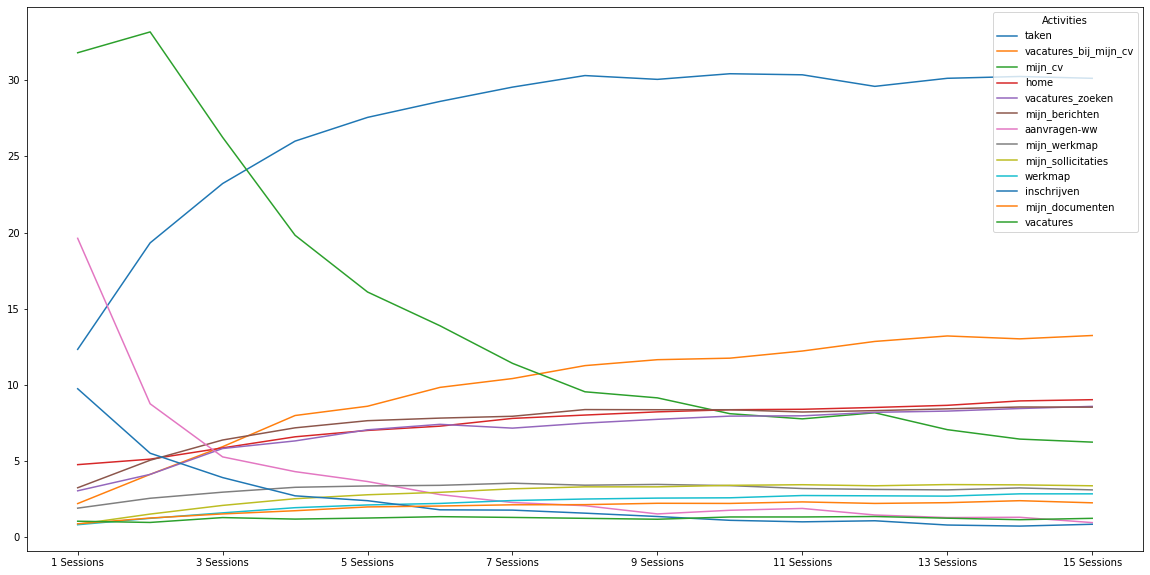

In [98]:
# plotting the relative frequency of frequently visited webpages over the sessions
activity_relative_frequency_over_sessions.plot.line(figsize=(20,10))
plt.show()

To answer the question of how the usage patterns change, we have aggregated the log data of customers beginning from their first session to the fifteenth session and analyzed the website's visits. The above figure provides valuable insights into changes in website usage behavior over time. We have introduced the visited web pages with a relative frequency higher than 1.1%. From the underlying diagram, we can detect a significant drop in the visit of the "mijn_cv" page. The relative frequency of **"mijn_cv"** decreased to less than 10% in the fifteenth, more than 25% in users' first session. A significant negative trend is also observed in the visit frequency of **"aanvragen-ww"** and **"inschrijven"**.

In contrast to **mijn_cv**, **"taken"** page follows an increasing preference trend over time. The relative frequency of taken has increased from 12.32% in the first sessions to 30.14% in the fifteenth sessions. In other web pages such as **"werkmap"**, **"mijn_sollicitaties"**, **"vacatures_zoeken"**, **"mijn_berichten"** and etc. we can observe an increasing trend however, the amplitude of the change is not significantly high.

The following figure is the exact figure in the article; as you see, the results, patterns, and trends are pretty similar; however, there are slight differences in some of the numbers because of the difference between the authors and us in the data cleaning phase.

<center>
    <img src="https://user-images.githubusercontent.com/35700552/152253851-c4655557-c1f5-4cb4-a018-f695be724192.png"  />
</center>    


**In order to identify the changes in the transition between websites we need to create the corresponding process maps. we will create the process map for the 1st and the 15th sessions.**

### Creating Process Model representing first sessions of customers

In [76]:
# susbeting the first sessions records from "clicks_logged_in_SelectedColumns" dataset
first_sessions_of_customers = clicks_logged_in_SelectedColumns[clicks_logged_in_SelectedColumns['SessionID'].isin(Sessions['1 Sessions'])]

In [77]:
# counting the repetitions of each activity for the 1st Sessions
activity_counts_first_sessions_of_customers = pd.DataFrame(first_sessions_of_customers['PAGE_NAME'].value_counts())

# calculating the relative frequency for the 1st Sessions
activity_counts_first_sessions_of_customers['Relative Frequency(%)'] = round(activity_counts_first_sessions_of_customers['PAGE_NAME']/len(first_sessions_of_customers)*100,2)

# resting the index of dataframe and renaming the columns
activity_counts_first_sessions_of_customers.reset_index(level=0, inplace=True)
activity_counts_first_sessions_of_customers=activity_counts_first_sessions_of_customers.rename(columns={'PAGE_NAME': 'Absolute Frequency','index': 'Activity' })

# we don't want decimals to be diplayed
activity_counts_first_sessions_of_customers['Absolute Frequency']=activity_counts_first_sessions_of_customers['Absolute Frequency'].apply('{:,.0f}'.format)

# printing the data for activities with more than 0.8 percent Relative Frequency
activity_counts_first_sessions_of_customers[activity_counts_first_sessions_of_customers['Relative Frequency(%)'] >= 0.8]


,Activity,Absolute Frequency,Relative Frequency(%)
0,mijn_cv,"192,033",31.82
1,aanvragen-ww,"118,418",19.62
2,taken,"74,368",12.32
3,inschrijven,"58,738",9.73
4,home,"28,596",4.74
5,mijn_berichten,"19,438",3.22
6,vacatures_zoeken,"18,202",3.02
7,vacatures_bij_mijn_cv,"13,170",2.18
8,mijn_werkmap,"11,374",1.88
9,vacatures,"6,171",1.02


In [78]:
# Storing the most frequent activities' names of first sessions into a list
most_frequent_activites_first_sessions = activity_counts_first_sessions_of_customers[activity_counts_first_sessions_of_customers['Relative Frequency(%)'] >= 0.8]['Activity'].tolist()
most_frequent_activites_first_sessions

['mijn_cv',
 'aanvragen-ww',
 'taken',
 'inschrijven',
 'home',
 'mijn_berichten',
 'vacatures_zoeken',
 'vacatures_bij_mijn_cv',
 'mijn_werkmap',
 'vacatures',
 'mijn_documenten',
 'ww',
 'mijn_sollicitaties']

In [79]:
# copying required columns into new data frames and renaming the columns
first_sessions_of_customers_log = first_sessions_of_customers[['SessionID', 'PAGE_NAME', 'TIMESTAMP']].copy()
first_sessions_of_customers_log=first_sessions_of_customers_log.rename(columns={'PAGE_NAME': 'activity','SessionID': 'case_id','TIMESTAMP': 'timestamp' })
first_sessions_of_customers_log.head()

,case_id,activity,timestamp
12,8162220,vacatures_bij_mijn_cv,2015-07-14 13:50:37.500
20,40492599,inschrijven,2015-12-21 09:33:11.770
161,8162220,vacatures_bij_mijn_cv,2015-07-14 13:36:08.140
163,8162220,vacatures_bij_mijn_cv,2015-07-14 14:03:25.847
164,8162220,vacatures_bij_mijn_cv,2015-07-14 14:03:20.593


In [80]:
# keeping only the records of most frequent actvities
first_sessions_of_customers_log = first_sessions_of_customers_log[first_sessions_of_customers_log['activity'].isin(most_frequent_activites_first_sessions)]

In [81]:
# creating Event Log
event_log_first_sessions = pm4py.format_dataframe(
    first_sessions_of_customers_log,
    case_id = 'case_id',
    activity_key = 'activity',
    timestamp_key = 'timestamp', 
    timest_format = '%Y-%m-%d %H:%M:%S%z'
)

In [107]:
xes_exporter.apply(event_log_first_sessions, 'event_log_first_sessions.xes')

exporting log, completed traces ::   0%|          | 0/25989 [00:00<?, ?it/s]

In [82]:
log_first_sessions = xes_importer.apply('event_log_first_sessions.xes')

parsing log, completed traces ::   0%|          | 0/25989 [00:00<?, ?it/s]

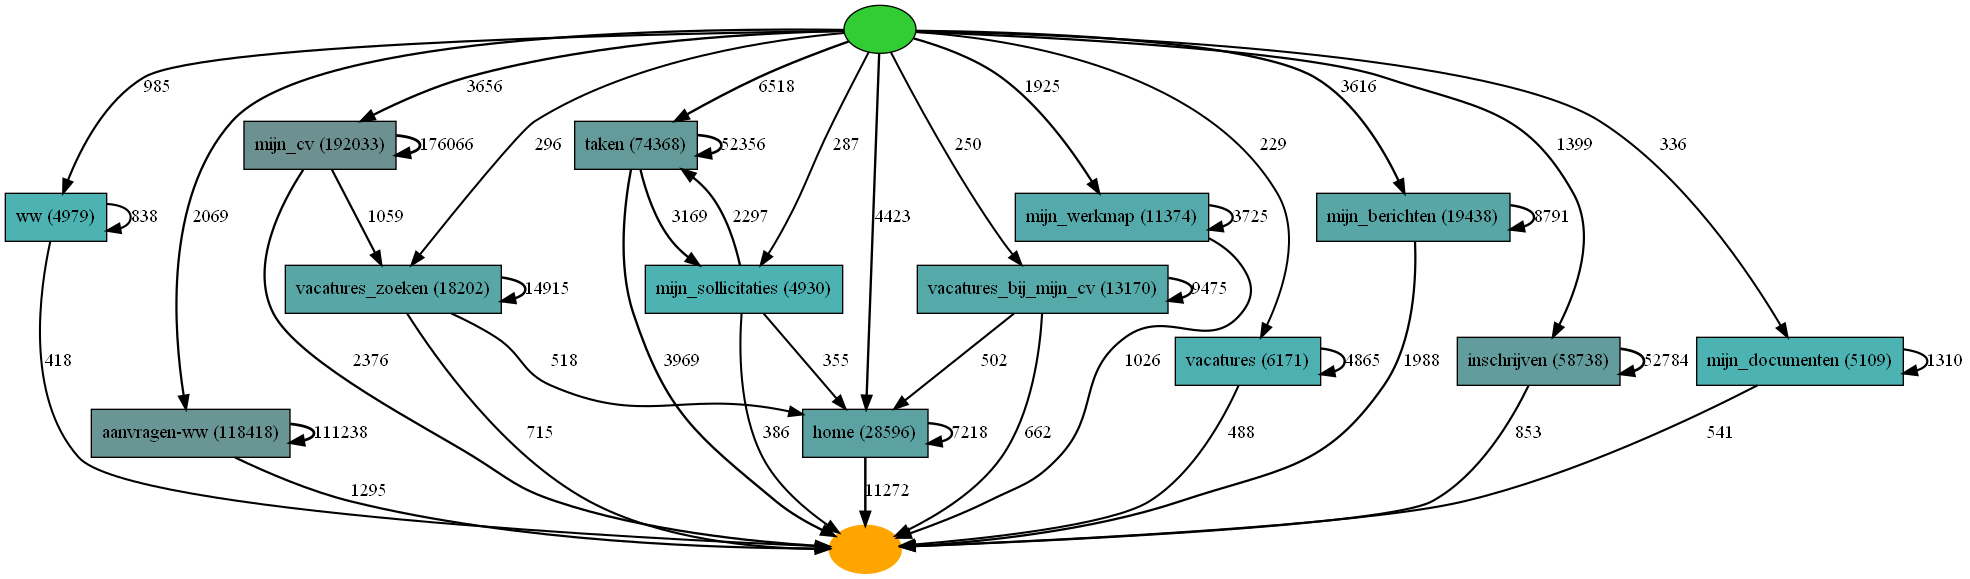

In [83]:
# Simplified Interface
heu_net = pm4py.discover_heuristics_net(
    log_first_sessions, dependency_threshold=0.997, 
    and_threshold=0.999, 
    loop_two_threshold=0.999
)
pm4py.save_vis_heuristics_net(heu_net, file_path='log_first_sessions-heuristics_net.png') 
pm4py.view_heuristics_net(heu_net)

As yous see, the above process map is similar to the following process map, which the authors of the article created using **DISCO** software.  
    
<br>    
    
<center>
    <img src="https://user-images.githubusercontent.com/35700552/151678886-2f66fdf8-c8a1-41b5-b346-f137af2f2a85.png"  />
</center>    





### Creating Process Model representing fifteenth sessions of customers

In [84]:
# susbeting the fifteenth sessions records from "clicks_logged_in_SelectedColumns" dataset
fifteenth_sessions_of_customers = clicks_logged_in_SelectedColumns[clicks_logged_in_SelectedColumns['SessionID'].isin(Sessions['15 Sessions'])]

In [92]:
# counting the repetitions of each activity for the 15th Sessions
activity_counts_fifteenth_sessions_of_customers = pd.DataFrame(fifteenth_sessions_of_customers['PAGE_NAME'].value_counts())

# calculating the relative frequency for the 15th Sessions
activity_counts_fifteenth_sessions_of_customers['Relative Frequency(%)'] = round(activity_counts_fifteenth_sessions_of_customers['PAGE_NAME']/len(fifteenth_sessions_of_customers)*100,2)

# resting the index of dataframe and renaming the columns
activity_counts_fifteenth_sessions_of_customers.reset_index(level=0, inplace=True)
activity_counts_fifteenth_sessions_of_customers=activity_counts_fifteenth_sessions_of_customers.rename(columns={'PAGE_NAME': 'Absolute Frequency','index': 'Activity' })

# we don't want decimals to be diplayed
activity_counts_fifteenth_sessions_of_customers['Absolute Frequency']=activity_counts_fifteenth_sessions_of_customers['Absolute Frequency'].apply('{:,.0f}'.format)

# printing the data for activities with more than 0.8 percent Relative Frequency
activity_counts_fifteenth_sessions_of_customers[activity_counts_fifteenth_sessions_of_customers['Relative Frequency(%)'] >= 1.2]


,Activity,Absolute Frequency,Relative Frequency(%)
0,taken,"43,175",30.14
1,vacatures_bij_mijn_cv,"18,948",13.23
2,home,"12,905",9.01
3,vacatures_zoeken,"12,278",8.57
4,mijn_berichten,"12,208",8.52
5,mijn_cv,"8,916",6.22
6,mijn_sollicitaties,"4,794",3.35
7,mijn_werkmap,"4,415",3.08
8,werkmap,"4,044",2.82
9,mijn_documenten,"3,193",2.23


In [86]:
# Storing the most frequent activities' names of first sessions into a list
most_frequent_activites_fifteenth_sessions = activity_counts_fifteenth_sessions_of_customers[activity_counts_fifteenth_sessions_of_customers['Relative Frequency(%)'] >= 1.2]['Activity'].tolist()
most_frequent_activites_fifteenth_sessions

['taken',
 'vacatures_bij_mijn_cv',
 'home',
 'vacatures_zoeken',
 'mijn_berichten',
 'mijn_cv',
 'mijn_sollicitaties',
 'mijn_werkmap',
 'werkmap',
 'mijn_documenten',
 'vragenlijst-uwv',
 'vacatures']

In [87]:
# copying required columns into new data frames and renaming the columns
fifteenth_sessions_of_customers_log = fifteenth_sessions_of_customers[['SessionID', 'PAGE_NAME', 'TIMESTAMP']].copy()
fifteenth_sessions_of_customers_log=fifteenth_sessions_of_customers_log.rename(columns={'PAGE_NAME': 'activity','SessionID': 'case_id','TIMESTAMP': 'timestamp' })
fifteenth_sessions_of_customers_log.head()

,case_id,activity,timestamp
28,23641212,inschrijven,2015-09-16 19:42:49.413
152,19390991,vacatures_bij_mijn_cv,2015-08-27 12:29:05.257
191,19390991,vacatures_bij_mijn_cv,2015-08-27 12:28:48.760
211,41233993,vacatures_bij_mijn_cv,2015-12-16 16:01:44.660
344,19390991,vacatures_bij_mijn_cv,2015-08-27 12:31:08.780


In [88]:
# keeping only the records of most frequent actvities
fifteenth_sessions_of_customers_log = fifteenth_sessions_of_customers_log[fifteenth_sessions_of_customers_log['activity'].isin(most_frequent_activites_fifteenth_sessions)]

In [89]:
# creating Event Log
event_log_fifteenth_sessions = pm4py.format_dataframe(
    fifteenth_sessions_of_customers_log,
    case_id = 'case_id',
    activity_key = 'activity',
    timestamp_key = 'timestamp', 
    timest_format = '%Y-%m-%d %H:%M:%S%z'
)

In [64]:
xes_exporter.apply(event_log_fifteenth_sessions, 'event_log_fifteenth_sessions.xes')

exporting log, completed traces ::   0%|          | 0/14532 [00:00<?, ?it/s]

In [90]:
log_fifteenth_sessions = xes_importer.apply('event_log_fifteenth_sessions.xes')

parsing log, completed traces ::   0%|          | 0/14532 [00:00<?, ?it/s]

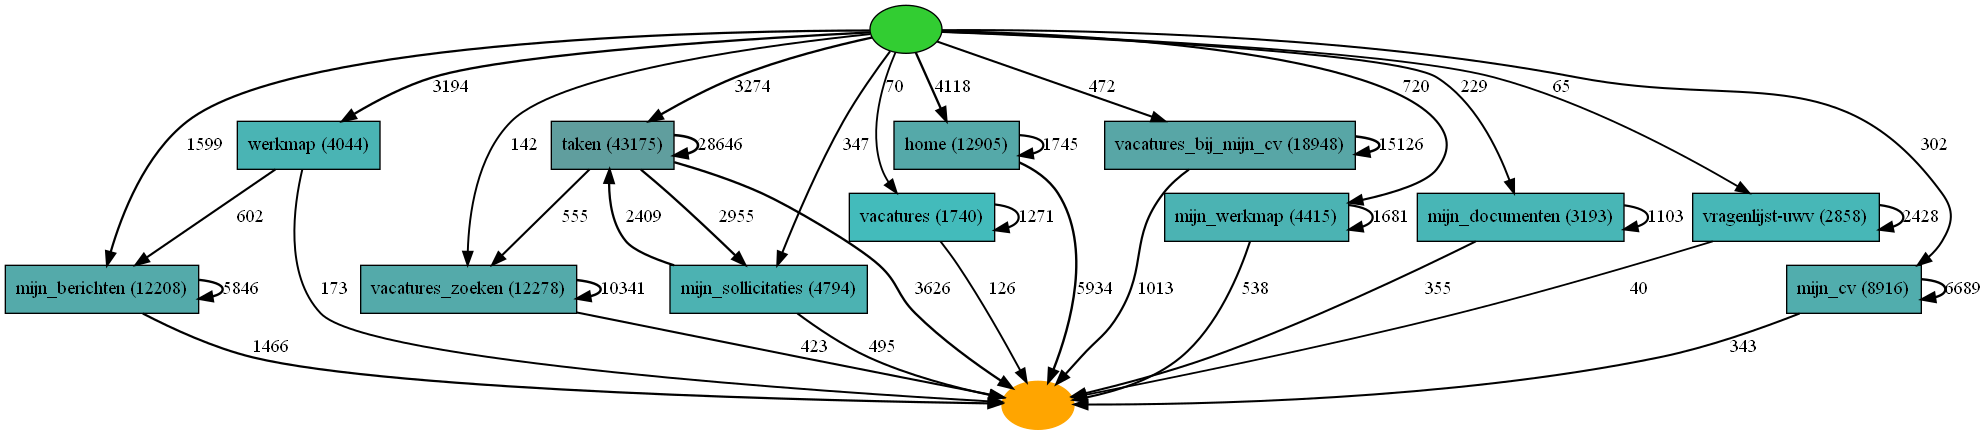

In [91]:
# Simplified Interface
heu_net = pm4py.discover_heuristics_net(
    log_fifteenth_sessions, dependency_threshold=0.997, 
    and_threshold=0.999, 
    loop_two_threshold=0.999
)
pm4py.save_vis_heuristics_net(heu_net, file_path='log_fifteenth_sessions-heuristics_net.png') 
pm4py.view_heuristics_net(heu_net)

As yous see, the above process map is similar to the following process map, which the authors of the article created using **DISCO** software.  The number within the process activities is the absolute frequency of visited websites.  A significant drop in the number of clicks can also be directly observed here compared to the process map of the first sessions we created before.  These process diagrams allow us to observe the process paths evolved.  A narrow analysis of process models reveals that the sequence of transitions did not change significantly with a few exceptions.  E.g., aanvragen-ww was one of the most visited websites in the earlier sessions, which almost disappeared towards the last sessions (the number of clicks dropped dramatically).

**So our outcome is quite similar to the result of the article.**
    
<br>    
    
<center>
    <img src="https://user-images.githubusercontent.com/35700552/152230128-8265c2f6-7e58-44d6-90ed-b2be2e8bfdd7.png"  />
</center>    


<div id="Transition_expensive_channels">
    <h2>Challenge 4: Transition to More Expensive Channels</h2>
</div>



Within this section, we give answers to several questions: Does the behavior of the customers change after they have send a Werkmap message, made a phone call or filed a complaint? Are customers more likely to use these channels again after they have used them for the first time? What is the customer behavior on the site after customers have been in contact through the Werkmap or by phone? As the first and third questions are strictly related to each other, we answer these questions in the following two subsections:

First we need to read the four following datasets:

* [BPI Challenge 2016: Clicks Logged In](https://data.4tu.nl/articles/dataset/BPI_Challenge_2016_Clicks_Logged_In/12674816/1)

* [BPI Challenge 2016: Questions](https://data.4tu.nl/articles/dataset/BPI_Challenge_2016_Questions/12687320/1)

* [BPI Challenge 2016: Werkmap Messages](https://data.4tu.nl/articles/dataset/BPI_Challenge_2016_Werkmap_Messages/12714569/1)

* [BPI Challenge 2016: Complaints](https://data.4tu.nl/articles/dataset/BPI_Challenge_2016_Complaints/12717647/1)

In [164]:
# reading the csv files of the datasets
clicks_logged_in = pd.read_csv('BPI2016_Clicks_Logged_In.csv', sep = ';', encoding = 'latin')
phone_calls = pd.read_csv('BPI2016_Questions.csv', sep = ';', encoding = 'latin')
workflow_messages = pd.read_csv('BPI2016_Werkmap_Messages.csv', sep = ';', encoding = 'latin')
complaints = pd.read_csv('BPI2016_Complaints.csv', sep = ';', encoding = 'latin')

###  Are customers more likely to use these channels again after they have used them for the first time?

In [165]:
Communication_Channels_Comparison = {'Communication Channel': ['Complaints', 'Werkmap','Questions(phone Call)'],
                     'Total Use': [len(complaints), len(workflow_messages), len(phone_calls)],
                     'Unique Customer Use': [complaints['CustomerID'].nunique(), workflow_messages['CustomerID'].nunique(), phone_calls['CustomerID'].nunique()],
                    }


                                                                                
# convert the dictionary into dataframe and add the sum of each column to the end of dataframe
Communication_Channels_Comparison = pd.DataFrame(data=Communication_Channels_Comparison)


Communication_Channels_Comparison = Communication_Channels_Comparison.sort_values('Total Use', ascending=False)
Communication_Channels_Comparison.reset_index(drop=True, inplace=True)


Communication_Channels_Comparison = Communication_Channels_Comparison.append(Communication_Channels_Comparison[['Total Use']].sum(),ignore_index=True)
Communication_Channels_Comparison.iloc[3,0] = 'Total Comunications(sum of the three above)'


Communication_Channels_Comparison['Relative Use (%)']= round(Communication_Channels_Comparison['Total Use']/Communication_Channels_Comparison.iloc[3,1]*100,2)

Communication_Channels_Comparison ['Averages (Total/Unique)'] = round(Communication_Channels_Comparison ['Total Use']/Communication_Channels_Comparison ['Unique Customer Use'],2)




# we don't want decimals to be diplayed

Communication_Channels_Comparison['Total Use']=Communication_Channels_Comparison['Total Use'].apply('{:,.0f}'.format)
Communication_Channels_Comparison['Unique Customer Use']=Communication_Channels_Comparison['Unique Customer Use'].apply('{:,.0f}'.format)

Communication_Channels_Comparison.iloc[3,4]= '-'
Communication_Channels_Comparison.iloc[3,3]= '-'
Communication_Channels_Comparison.iloc[3,2]= '-'

Communication_Channels_Comparison


,Communication Channel,Total Use,Unique Customer Use,Relative Use (%),Averages (Total/Unique)
0,Questions(phone Call),"123,403","21,533",65.03,5.73
1,Werkmap,"66,058","16,653",34.81,3.97
2,Complaints,289,226,0.15,1.28
3,Total Comunications(sum of the three above),"189,750",-,-,-


In order to answer this question we have to identify the relevant exploratory statistics about the customers, who used the expensive channels such as sending werkmap message, complaints or contacting the call center. As depicted in the above tabled the total number of contacts via complaints, werkmap and questions are 289, 66,058 and 123,403 respectively. These numbers suggest that calling the customer center is the mostly preferred communication channel by almost doubling the number of werkmap messages.

Filling complaints is rarely used by customers as means of communication by corresponding to 0.15% of total contacts.
A further analysis reveals that some customers have used the different channels multiple times as only 226, 16,653 and 21,533 unique customers sent complaints, werkmap messages and questions respectively.

Considering the averages, we can argue that the customers tend to contact call centers to ask questions (5.73 times) and send werkmap messages (3.97 times) relatively more after they have used them for the first time. This number is 1.28 for sending complaints which implies that with a few exceptions, the customers don’t tend to fill the complaints after their first time.

We created the following charts with Microsoft **PowerBI** and as you see, it totally matches the results of the above table, which we developed with python codes separately:


<br>    
    
<center>
    <img src="https://user-images.githubusercontent.com/35700552/152347869-84cb1f4b-c86e-4ae7-b728-fd163f353be0.png"  />
</center>   

<br>

And here is the same charts in the article, as you can see it  is identical to our results:

<br>    
    
<center>
    <img src="https://user-images.githubusercontent.com/35700552/152349814-7a544c38-75f2-4d8a-b87e-2ae83a6cddc3.png"  />
</center>   



In [175]:
clicks_logged_in.head(2)

,CustomerID,AgeCategory,Gender,Office_U,Office_W,SessionID,IPID,TIMESTAMP,VHOST,URL_FILE,PAGE_NAME,REF_URL_category,page_load_error,page_action_detail,tip,service_detail,xps_info,page_action_detail_EN,service_detail_EN,tip_EN
0,2025826,50-65,V,313,313,12956475,620841,2015-10-05 10:12:56.880000000,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/uwv-die...,50plus,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025826,50-65,V,313,313,13243433,620841,2015-09-30 15:14:35.943000000,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/uwv-die...,50plus,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
phone_calls.head(2)

,CustomerID,AgeCategory,Gender,Office_U,Office_W,ContactDate,ContactTimeStart,ContactTimeEnd,QuestionThemeID,QuestionSubthemeID,QuestionTopicID,QuestionTheme,QuestionSubtheme,QuestionTopic,QuestionTheme_EN,QuestionSubtheme_EN,QuestionTopic_EN
0,1876596,18-29,M,257,261,2015-08-24,14:00:34.0000000,14:05:23.0000000,41,28861,28896,WN WW,Sollicitatie (WWZ 1-7-2015),Sollicitatieplicht: Moet ik solliciteren als i...,WN WW,Application (WWZ 1 7 2015),Job Duty: Should I apply if I go back to work?
1,722160,18-29,M,305,305,2015-08-27,11:50:08.0000000,11:55:34.0000000,41,15159,11672,WN WW,Betaling,Wanneer is/wordt mijn WW-uitkering overgemaakt?,WN WW,Payment,When is/are transferred my unemployment benefits?


In [55]:
workflow_messages.head(2)

,CustomerID,AgeCategory,Gender,Office_U,Office_W,EventDateTime,EventType,HandlingChannelID
0,2032131,18-29,M,271,271,2015-11-02 01:36:53.0000000,Werkmap message,1
1,2032131,18-29,M,271,271,2015-11-05 21:35:43.0000000,Werkmap message,1


In [281]:
complaints.head(2)

,CustomerID,AgeCategory,Gender,Office_U,Office_W,ComplaintDossierID,ComplaintID,ContactDate,ContactChannelID,ComplaintThemeID,ComplaintSubthemeID,ComplaintTopicID,ComplaintTheme,ComplaintSubtheme,ComplaintTopic,ComplaintTheme_EN,ComplaintSubtheme_EN,ComplaintTopic_EN
0,1945807,50-65,M,230,233,197,220,2016-01-12,8,1,5,1,behandelingsduur,n.v.t.,(herzienings)besluit wordt niet / te laat genomen,duration of treatment,N.A.,(Revision) Decision not/too late taken
1,733565,30-39,M,296,290,198,221,2016-01-12,8,1,5,1,behandelingsduur,n.v.t.,(herzienings)besluit wordt niet / te laat genomen,duration of treatment,N.A.,(Revision) Decision not/too late taken


### Simplifying and Merging the Four Datasets

To merge the four datasets based on CustomerId first, we need to simplify our data in a way that we have similar columns for each one:

### Complaints Dataset

Since the complaints dataset doesn't comprise time and only have dates, to make this data set consistent with the other three datasets, we will generate random times, and we will add it to our data:

In [176]:
#defining a function to generate random datetime

def random_datetimes_or_dates(start, end, out_format='datetime', n=10): 

    (divide_by, unit) = (10**9, 's') if out_format=='datetime' else (24*60*60*10**9, 'D')

    start_u = start.value//divide_by
    end_u = end.value//divide_by

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit=unit) 

In [177]:
# genertating 289 (number of complaints dataset records) random datetimes
start = pd.to_datetime('2000-01-01')
end = pd.to_datetime('2005-01-01')
random_datetime =random_datetimes_or_dates(start, end, out_format='datetime', n=289)
random_datetime = pd.DataFrame(random_datetime)
random_datetime.head(2)

,0
0,2000-12-12 10:18:52
1,2000-02-25 04:13:38


In [178]:
# since complaints dataset has dates itself, we only need the random times so we divide random datetimes to date and time columns

random_datetime['Time'] = pd.to_datetime(random_datetime[0]).dt.time
random_datetime.head(2)

,0,Time
0,2000-12-12 10:18:52,10:18:52
1,2000-02-25 04:13:38,04:13:38


In [179]:
# Here we combine actual dates from complaints dataset with random times we genereted to create a complete datetime column 

complaints_datetime = pd.DataFrame(data={'date': complaints.ContactDate, 'time' : random_datetime['Time']})
complaints_datetime['date'] = pd.to_datetime(complaints_datetime['date']).dt.date
complaints_datetime['datetime'] = complaints_datetime.apply(lambda r : pd.datetime.combine(r['date'],r['time']),1)
complaints_datetime.head()

,date,time,datetime
0,2016-01-12,10:18:52,2016-01-12 10:18:52
1,2016-01-12,04:13:38,2016-01-12 04:13:38
2,2016-02-01,18:40:22,2016-02-01 18:40:22
3,2015-12-11,01:35:18,2015-12-11 01:35:18
4,2015-07-07,22:05:28,2015-07-07 22:05:28


In [180]:
## Simplify complaints

complaints_simp = pd.DataFrame(data={'customerID': complaints.CustomerID, "activity" : "complaint", "date" : complaints_datetime['datetime']})
complaints_simp.head()


,customerID,activity,date
0,1945807,complaint,2016-01-12 10:18:52
1,733565,complaint,2016-01-12 04:13:38
2,413563,complaint,2016-02-01 18:40:22
3,2027840,complaint,2015-12-11 01:35:18
4,1202227,complaint,2015-07-07 22:05:28


### Phone Calls Dataset

In [181]:
## Simplify phone_calls

phone_calls_simp = pd.DataFrame(data={'customerID': phone_calls.CustomerID, "activity" : "phone_call", "date" : phone_calls.ContactDate +' '+ phone_calls.ContactTimeStart})
phone_calls_simp['date'] = pd.to_datetime(phone_calls_simp['date'])
phone_calls_simp.head()


,customerID,activity,date
0,1876596,phone_call,2015-08-24 14:00:34
1,722160,phone_call,2015-08-27 11:50:08
2,1536943,phone_call,2015-08-20 11:01:16
3,1816718,phone_call,2015-08-27 12:19:28
4,1983285,phone_call,2015-08-27 13:54:03


### Workflow Dataset

In [190]:
## Simplify workflow_messages
workflow_messages_simp = pd.DataFrame(data={'customerID': workflow_messages.CustomerID, "activity" : "workflow_message", "date" : workflow_messages.EventDateTime})
workflow_messages_simp['date'] = pd.to_datetime(workflow_messages_simp['date'])
workflow_messages_simp.head()


,customerID,activity,date
0,2032131,workflow_message,2015-11-02 01:36:53
1,2032131,workflow_message,2015-11-05 21:35:43
2,2032131,workflow_message,2015-11-06 15:47:15
3,2085395,workflow_message,2015-10-20 23:44:39
4,2085395,workflow_message,2016-01-20 23:04:25


In [191]:
## Simplify clicks_logged_in

clicks_logged_in_simp = pd.DataFrame(data={'customerID': clicks_logged_in.CustomerID, "activity" : "surfing_webpages", "date" : clicks_logged_in.TIMESTAMP})
clicks_logged_in_simp['date'] = pd.to_datetime(clicks_logged_in_simp['date'])
clicks_logged_in_simp.head()


,customerID,activity,date
0,2025826,surfing_webpages,2015-10-05 10:12:56.880
1,2025826,surfing_webpages,2015-09-30 15:14:35.943
2,1503890,surfing_webpages,2015-09-01 19:35:06.707
3,2063574,surfing_webpages,2015-11-06 10:47:42.137
4,2185161,surfing_webpages,2016-01-11 18:44:07.877
